# **Zomato Restaurant Clustering**     



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Name of the member -ABISHEK**
##### **Batch Name**     - 15 July


# **Project Summary -**

**Project Summary**: Zomato Restaurant Clustering

This project aimed to cluster Zomato restaurants using various features to identify market segments.

**Key Steps:**

**Data Loading & Understanding:** Loaded and examined two datasets containing restaurant metadata and reviews.

**Data Wrangling:** Handled missing values and outliers. Created new features (e.g., Followers_Per_Review). Applied One-Hot Encoding for cuisines and text preprocessing for reviews (contraction expansion, lowercasing, punctuation/URL/digit/stopword removal, tokenization).

**Exploratory Data Analysis (EDA):** Visualized data distributions and relationships. Found high ratings are common, costs are skewed towards lower values, and North Indian/Chinese/Continental are popular cuisines. Observed a correlation between review and follower counts but weak correlations with rating.

**Hypothesis Testing:** Confirmed significant differences in average ratings based on the proportion of high ratings and cost, and a significant difference in follower counts based on review counts.

**Clustering (K-Means & Hierarchical):** Applied K-Means and Hierarchical clustering (both with K=4) on scaled numerical and encoded categorical features. Analyzed cluster characteristics to identify distinct restaurant segments (e.g., Highly-Rated, Low-Rated/Budget, High Activity). K-Means with K=2 showed the highest Silhouette score, but K=4 provided more detailed segmentation.

**Model Saving:** Saved the K-Means model (K=4) for potential future use.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Problem Statements.**
1. **Sentiment Analysis of Customer Reviews :**
    *   Identifying the overall sentiment (positive,negative and neutral) of customer reviews to understand customer satisfaction and dissatisfaction trends.
2. **Clustering Restaurants Based on Various Features :**
    *   Grouping Zomato-listed restaurants based on attributes like customer reviews, ratings, cuisines and pricing to identify market segments.
3. **Cost vs Benefit Analysis of Restaurants :**
    *   To compare customer satisfaction (reviews/ratings) with restaurant cost data to help users find value-for-money options.
4. **Identifying Critics and Influential Reviewers :**
    * Analyze reviewer metadata to detect influential or highly active users who might be critics or expert reviewers in the industry.

5. **Cuisine-Based Preference Analysis :**
    * Understand which cuisines receive the most positive or negative feedback to aid restaurants in menu optimization.

6. **Reviewer Behavior Analysis :**
    * Segment reviewers by frequency, sentiment polarity, or review length to uncover review patterns.















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [49]:
# this project needs some of the main libraries used by data scientists to perform end to end analysis

import pandas as pd   # Necessary for data manipulation, aggregation, and data preprocessing
import numpy as np    # Suited for efficient operations
import matplotlib.pyplot as plt
import seaborn as sns # Used for visualization
import sklearn as skl # To build models

### Dataset Loading

In [50]:
# Loading restaurant reviews dataset into a variable named res_rev
try:
  res_name = pd.read_csv("/content/Zomato Restaurant names and Metadata.csv")
  # Loading restaurant names related dataset into a variable named res_name
  res_rev = pd.read_csv("/content/Zomato Restaurant reviews.csv")
except Exception as e:
  print(f"An error has occured while loading the dataset: {e}")

### Dataset First View

In [51]:
# Checking the datasets are loaded properly using .head() functions
res_rev.head(5)  # restaurant reviews dataset
res_name.head(5) # restaurant names dataset

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


### Dataset Rows & Columns count

---



In [52]:
# Checking for the shape of the dataset using shape attribute
try:
  print(f"Restaurant reviews dataset has {res_rev.shape[0]} rows and {res_rev.shape[1]} columns")
  print(f"Restaurant names dataset has {res_name.shape[0]} rows and {res_name.shape[1]} columns")
except Exception as e:
  print(f"An error has occured while checking the shape of the datasets: {e}")

Restaurant reviews dataset has 10000 rows and 7 columns
Restaurant names dataset has 105 rows and 6 columns


### Dataset Information

In [53]:
# Using info() method to get an idea about the columns , data types and null counts
try:
  print("Trying  to get an idea about the columns , data types and null counts of restaurant reviews dataset....")
  res_rev.info()
except Exception as e:
  print(f"An error has occured while using info method! {e}")

try:
  print("\nTrying  to get an idea about the columns , data types and null counts of restaurant names dataset....")
  res_name.info()
except Exception as e:
  print(f"An error has occured while using info method! {e}")

Trying  to get an idea about the columns , data types and null counts of restaurant reviews dataset....
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB

Trying  to get an idea about the columns , data types and null counts of restaurant names dataset....
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   C

#### Duplicate Values

In [54]:
# Checking for the existence of any duplicates in restaurant names dataset
""" checking only for Name and Links columns as they uniquely identify
a restaurant and other columns like collections , timings etc are more like categorical columns"""
try:
  print("Columns like Name and Links in restaurant names dataset has {} duplicates".format(res_name.duplicated(subset = ["Name","Links"]).sum()))
except Exception as e:
  print(f"An error has occured while checking for duplicates! {e}")

# Checking for duplicates in restaurant reviews dataset
try:
  print("Restaurant reviews dataset has {} duplicates".format(res_rev.duplicated().sum()))
except Exception as e:
  print(f"An error has occured while checking for duplicates! {e}")


Columns like Name and Links in restaurant names dataset has 0 duplicates
Restaurant reviews dataset has 36 duplicates


In [55]:
# Let's look at the percentage of duplicates in both dataset
try:
  print("Percentage of duplicates in the restaurant name dataset is {} %".format(res_name.duplicated(subset = ["Name","Links"]).sum()/res_name.shape[0]*100))
except Exception as e:
  print(f"An error has occured while checking for duplicates in restaurant names dataset! {e}")

# Calculating the percentage of duplicates in restaurant reviews dataset
try:
  print("Percentage of duplicates in the restaurant reviews dataset is {} %".format(res_rev.duplicated().sum()/res_rev.shape[0]*100))
except Exception as e:
  print(f"An error has occured while checking for duplicates in restaurant reviews dataset! {e}")

Percentage of duplicates in the restaurant name dataset is 0.0 %
Percentage of duplicates in the restaurant reviews dataset is 0.36 %


#### Missing Values/Null Values

In [56]:
# Missing Values/Null Values Count
# Checking for any null/ Missing values in restaurant names dataset
try:
  cols = list(res_name.columns)
  print("Checking for any null/ Missing values in restaurant names dataset \n")
  for i in cols:
    print(f"column {i} has {res_name[i].isnull().sum()} missing values")
except Exception as e:
  prinnt("An error has occured while checking for missing values in restaurant names dataset! {e}")

# Checking for any null/ Missing values in restaurant reviews dataset
try:
  cols = list(res_rev.columns)
  print("\nChecking for any null/ Missing values in restaurant reviews dataset \n")
  for i in cols:
    print(f"column {i} has {res_rev[i].isnull().sum()} missing values")
except Exception as e:
  print(f"An error has occured while checking for missing values in restaurant names dataset! {e}")

Checking for any null/ Missing values in restaurant names dataset 

column Name has 0 missing values
column Links has 0 missing values
column Cost has 0 missing values
column Collections has 54 missing values
column Cuisines has 0 missing values
column Timings has 1 missing values

Checking for any null/ Missing values in restaurant reviews dataset 

column Restaurant has 0 missing values
column Reviewer has 38 missing values
column Review has 45 missing values
column Rating has 38 missing values
column Metadata has 38 missing values
column Time has 38 missing values
column Pictures has 0 missing values


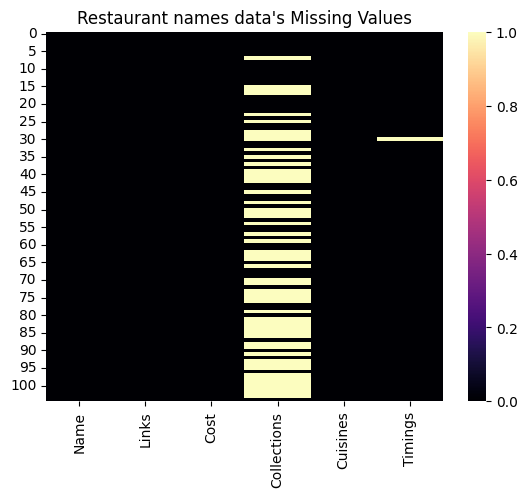

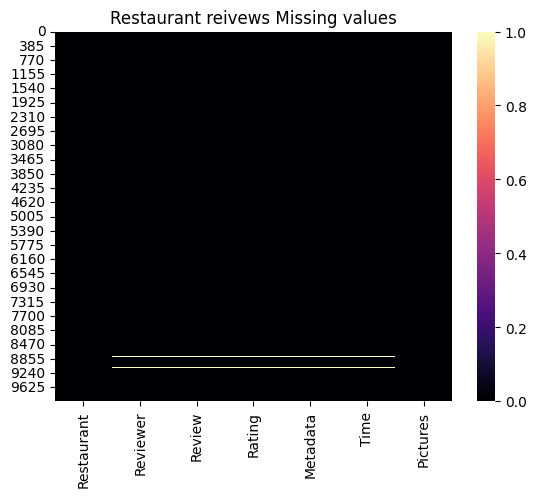

In [57]:
# Visualizing the missing values in restaurant names dataset
try:
  sns.heatmap(res_name.isnull(), cbar=True, cmap='magma')
  plt.title("Restaurant names data's Missing Values")
  plt.show()
except Exception as e:
  print(f"An error has occured while visualizing missing values in restaurant names dataset! {e}")

# Visualizing the missing values in restaurant reviews dataset
try:
  sns.heatmap(res_rev.isnull(),cbar = True,cmap = 'magma')
  plt.title("Restaurant reivews Missing values")
  plt.show()
except Exception as e:
  print(f"An error has occured while visualizing missing values in restaurant reviews dataset! {e}")


### What did you know about your dataset?

1. **Shape of both the datasets :**
   *   Restaurant reviews dataset has 10000 rows and 7 columns
   *   Restaurant names dataset has 105 rows and 6 columns

2. **data types are perfect as the way it should be and time related columns needs to be preprocessed before implementing models**

3. **Duplicates exploration :**
   *   In the 'restaurant names dataset' duplicates can be found by inspecting the name and links of the restaurant as they provide unique combinations and found that there's no duplicates in the dataset.
   *   In the 'restaurant reviews dataset' there's 36 duplicates which is 0.36 percentage.

4. **Missing values evaluation :**
   * In 'restaurant reviews dataset' there's a pattern in which the data is missing and further investigation is needed to come to a conclusion.
   * In 'restaurant names dataset' there huge amount of missing values especially in 'collection' column which is almost 51 percentage of data is missing and needs to be discussed about it's existence.

5. Visualization of missing data helped to find the nature of missingness.




## ***2. Understanding Your Variables***

In [58]:
# Dataset Columns
#Displaying all the columns in resaturant names dataset
try:
  cols = res_name.columns
  print("Columns in restaurant names dataset are: \n")
  for i,j in enumerate(cols):
    print(i,j)

except Exception as e:
  print(f"An error has occured while displaying the columns of restaurant names dataset! {e}")

#Displaying all the columns in resaturant reviews dataset
try:
  cols = res_rev.columns
  print("\nColumns in restaurant reviews dataset are: \n")
  for i,j in enumerate(cols):
    print(i,j)
except Exception as e:
  print(f"An error has occured while displaying the columns of restaurant reviews dataset! {e}")

Columns in restaurant names dataset are: 

0 Name
1 Links
2 Cost
3 Collections
4 Cuisines
5 Timings

Columns in restaurant reviews dataset are: 

0 Restaurant
1 Reviewer
2 Review
3 Rating
4 Metadata
5 Time
6 Pictures


In [59]:
# Dataset Describe
# Describing the characteristics of restaurant names dataset are
print("describing restaurant names dataset:")
res_name.describe(include = 'all')
print("describing restaurant reviews dataset")
res_rev.describe(include = 'all')

describing restaurant names dataset:
describing restaurant reviews dataset


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Variables Description

**1. DESCRIPTION OF RESTAURANT NAMES DATASET :**
   * Cost: (Per person dining cost)
     *   Average cost of per person dining is 861
     *   The range of per person cost is from 150 to 2800
   * Name: (Name of the Restaurant)
   * Links: (website link of the restaurants)
   * Collections: (Restaurant categories segemented by Zomato)
   * Cuisines:
     * There're 92 combinations of cuisines are being served by those 105 restaurants.
   * Timings: (Restaurant opening and closing timings)

**2. DESCRIPTION OF RESTAURANT REVIEWS DATASET :**
   * Rating: (Ratings given by the reviewers)
     * ratings starts from 1 to 5 and the average rating for all the restaurants is 3.6
   * Restaurant: (Name of the restaurant for which the reviews are about)
   * Reviewers: (Name of the reviewers)
   * Metadata: (Reviews and followers count of individual reviewers)
   * Time: (Time at which the review has been posted)
   * Pictures: (If the review has any image of the food or restaurant)

### Check Unique Values for each variable.

In [60]:
# Check Unique Values for each variable.
# Unique values in restuarant names dataset
try:
  print("Count of unique values in each of the columns\n")
  for i in res_name.columns:
    print(f"column {i} has {res_name[i].nunique()} unique values")
except Exception as e:
  print(f"There has been error while checking the unique values in restaurant names dataset {e}")

# Unique values in restuarant reviews dataset
try:
  print("\nCount of unique values in each of the columns\n")
  for i in res_rev.columns:
    print(f"column {i} has {res_rev[i].nunique()} unique values")
except Exception as e:
  print(f"there has been error while checking the unique values in restaurant names dataset {e}")

Count of unique values in each of the columns

column Name has 105 unique values
column Links has 105 unique values
column Cost has 29 unique values
column Collections has 42 unique values
column Cuisines has 92 unique values
column Timings has 77 unique values

Count of unique values in each of the columns

column Restaurant has 100 unique values
column Reviewer has 7446 unique values
column Review has 9364 unique values
column Rating has 10 unique values
column Metadata has 2477 unique values
column Time has 9782 unique values
column Pictures has 36 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [61]:
# Stage 1: Handling missing values and duplicates in Restaurant names dataset
# With our previous analysis we found that in restaurant names dataset, Collection column has 54 rows of missing values which is 51.42 percentage.
# I decided to remove the collection column for it's huge amount of missing values and since it's not going to get featured as a column while clustering
try:
  res_name = res_name[res_name['Timings'].notna()]
  res_name["Cost"] = pd.to_numeric(res_name["Cost"].str.replace(',', ''), errors='coerce')
except Exception as e:
  print(f"There has been an error while dealing with missing values in restaurant names dataset {e}")


# Handling missing values and duplicates in restaurant reviews dataset
# since restaurant reviews dataset has only 0.36 percengate of duplicates and very few missing values , i decided to drop them as they don't going to result in significant data loss.
try:
  res_rev.dropna(inplace = True)
  # removing time column as we have the date of the review being posted.
  # changing the data type of rating column to float
  res_rev['Rating'] = pd.to_numeric(res_rev['Rating'], errors='coerce')

  # Extracting numerical data from 'Metadata'
  res_rev['Reviews_Count'] = res_rev['Metadata'].str.extract(r'(\d+)\s*Review').astype(float)
  res_rev['Followers_Count'] = res_rev['Metadata'].str.extract(r'(\d+)\s*Follower').astype(float)

  # Basic text preprocessing for 'Review' column
  res_rev['Review'] = res_rev['Review'].str.lower().str.replace('[^\w\s]', '', regex=True)


except Exception as e:
  print(f"There has been an error while dealing with missing values in restaurant reviews dataset {e}")

# Function to check for string cleaning
def check_string_issues(df, df_name):
    print(f"Checking string columns in {df_name}:")
    for col in df.select_dtypes(include='object').columns:
        print(f"\nColumn: '{col}'")
        # Check for leading/trailing spaces in a sample of unique values
        unique_values = df[col].unique()
        print(f"  Number of unique values: {len(unique_values)}")
        print("  Sample of unique values (checking for extra spaces):")
        for value in unique_values[:10]:
            if isinstance(value, str):
                print(f"    '{value}' (Has leading/trailing spaces: {value != value.strip()})")
            else:
                print(f"    {value} (Not a string)")

        # Check for variations in capitalization in a sample
        if all(isinstance(v, str) for v in unique_values[:10]):
             sample_lower = [v.lower() for v in unique_values[:10]]
             if len(set(sample_lower)) < len(set(unique_values[:10])):
                 print("  Potential capitalization variations observed in sample.")

# Check res_name for string issues
check_string_issues(res_name, 'res_name')

# Check res_rev for string issues
check_string_issues(res_rev, 'res_rev')

Checking string columns in res_name:

Column: 'Name'
  Number of unique values: 104
  Sample of unique values (checking for extra spaces):
    'Beyond Flavours' (Has leading/trailing spaces: False)
    'Paradise' (Has leading/trailing spaces: False)
    'Flechazo' (Has leading/trailing spaces: False)
    'Shah Ghouse Hotel & Restaurant' (Has leading/trailing spaces: False)
    'Over The Moon Brew Company' (Has leading/trailing spaces: False)
    'The Fisherman's Wharf' (Has leading/trailing spaces: False)
    'eat.fit' (Has leading/trailing spaces: False)
    'Shah Ghouse Spl Shawarma' (Has leading/trailing spaces: False)
    'Hyper Local' (Has leading/trailing spaces: False)
    'Cream Stone' (Has leading/trailing spaces: False)

Column: 'Links'
  Number of unique values: 104
  Sample of unique values (checking for extra spaces):
    'https://www.zomato.com/hyderabad/beyond-flavours-gachibowli' (Has leading/trailing spaces: False)
    'https://www.zomato.com/hyderabad/paradise-gachibo

/tmp/ipython-input-61-2096698516.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_name["Cost"] = pd.to_numeric(res_name["Cost"].str.replace(',', ''), errors='coerce')


### What all manipulations have you done and insights you found?

**TRANSFORMATION IN RESTAURANT NAMES DATASET**
1. Droped the Collections column from the dataset as it not gonna give any insights with huge amount of nulls.
2. Removed 1 null row from Timings column
3. Checked for any string related errors(trailing space , captilization)using check_string_issues function in object data type columns and found that it's perfectly clean.

**TRANSFORMATION IN RESTAURANT REVIEWS DATASET**
1. Removed all the null values in the dataset as it's relatively very samll.
2. Changed the data type of rating from object to float
3. used check_string_issues function to check any trailing spaces and capitalization errors in the dataset and found that those columns are working properly.
4. Created couple of new columns for reviewer's review count and their respective followers.
**INSIGHTS :**
1. Data preprocessing is mandatory for analysing reviews columns to gain insights as it's now in unprepared.
2. Using column with half of the data points being amputated could cause baised or skew the analysis. this is the reason behind removing the collections column.
3. There's a pattern in the missingness of data in reviews dataset but considering the percentage of them (0.36) made me removing them.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

/tmp/ipython-input-62-4137454897.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=res_rev, x='Rating', palette='viridis')


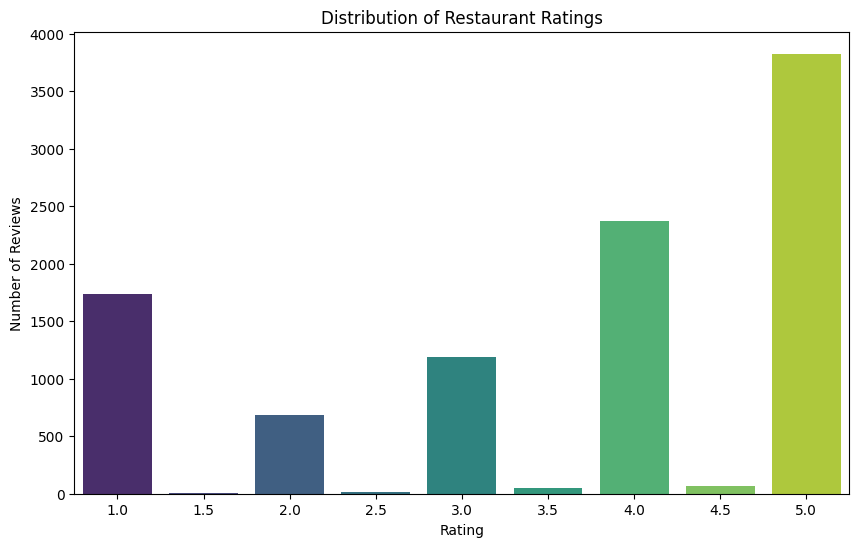

In [62]:
# Chart - 1 visualization code: Distribution of Restaurant Ratings

plt.figure(figsize=(10, 6))
sns.countplot(data=res_rev, x='Rating', palette='viridis')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

##### 1. Why did you pick the specific chart?

In order to perform univariate analysis on variables, i chose distribution of restaurant's ratings and to get the count of those five ratings i decided to use countplot which is usefull in analysing frequencies in columns.

##### 2. What is/are the insight(s) found from the chart?

From the distribution of restaurant ratings chart, I can see the frequency of each rating value. It appears that the rating of 5.0 is the most frequent, followed by 4.0. Ratings of 1.0 and 1.5 are the least frequent. This suggests that a large number of reviews are positive, with fewer negative reviews. further analysis could reveal the reason for low ratings.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The high number of positive reviews could be used in marketing to attract new customers and build trust.

#### Chart - 2

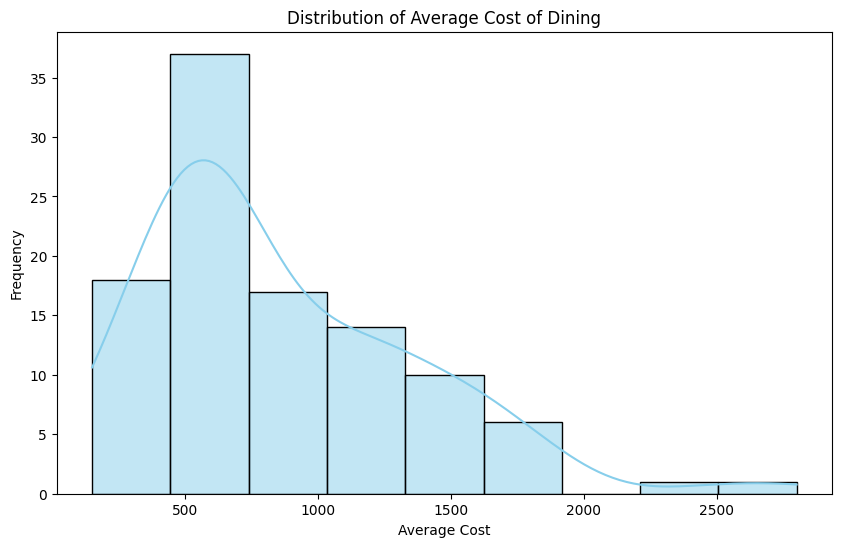

In [63]:
# distribution of average cost of dining
plt.figure(figsize=(10, 6))
sns.histplot(data=res_name, x='Cost', kde=True, color='skyblue')
plt.title('Distribution of Average Cost of Dining')
plt.xlabel('Average Cost')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a histogram with a Kernel Density Estimate (KDE) to visualize the distribution of the average cost of dining because it's an effective way to show the frequency of different cost ranges. The histogram bars represent the number of restaurants within each cost interval, and the KDE line provides a smoothed representation of the distribution.

##### 2. What is/are the insight(s) found from the chart?

1. The peak of the distribution appears to be somewhere around the 500-800 range, suggesting that this is the most common average cost for dining in this dataset.
2. There are fewer restaurants in the higher cost ranges.
3. The distribution of average dining cost is skewed to the right, indicating that most restaurants have lower average costs, with fewer restaurants having higher average costs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 1.Yes this visuals helps to create a positive impact such as Knowing the most common cost range (500-800) allows businesses to understand the primary market segment and tailor thier marketing strategy.
 2. Restaurant can ensure they stay competitive by adhering to the average rates.

#### Chart - 3

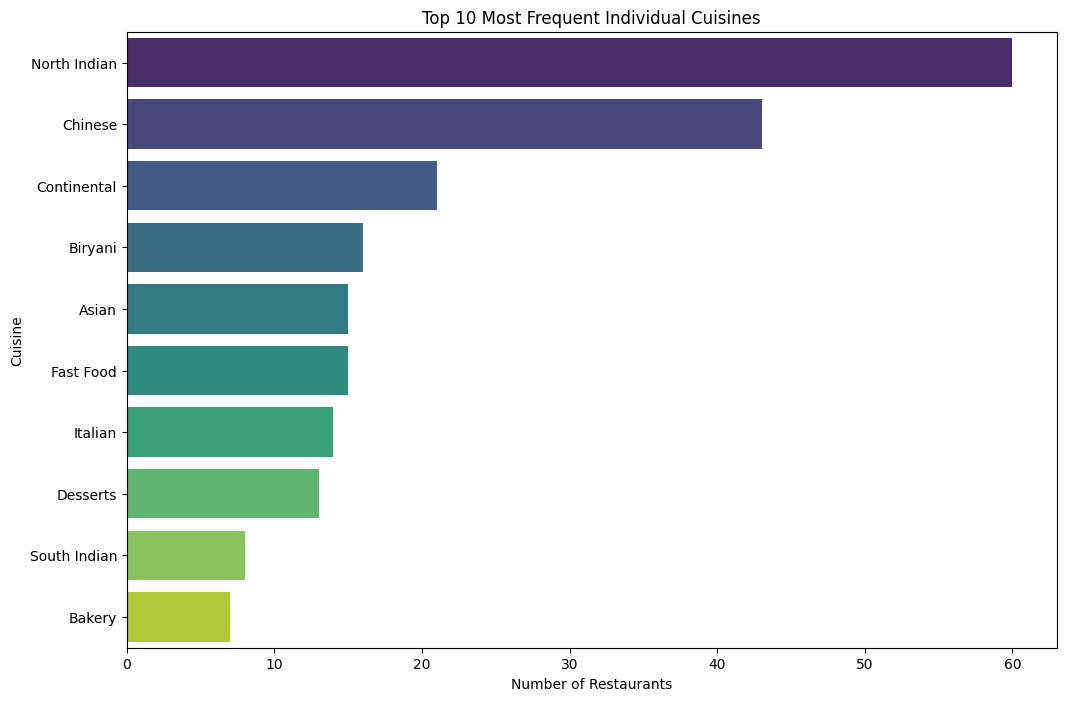

In [64]:
# Frequencies of different cuisines
cuisines_list = res_name['Cuisines'].str.split(', ').explode()
cuisine_counts = cuisines_list.value_counts()

# Select the top 10 most frequent individual cuisines
top_10_cuisines = cuisine_counts.head(10)

# Chart - 3 visualization code: Frequencies of individual cuisines
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_cuisines.values, y=top_10_cuisines.index, palette='viridis', hue=top_10_cuisines.index, legend=False)
plt.title('Top 10 Most Frequent Individual Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()

##### 1. Why did you pick the specific chart?

`In order to perform univariate analysis on the frequency of different cuisines, I chose a horizontal bar plot. This chart is effective for displaying the counts of categorical data, especially when there are many categories, as it makes the labels easier to read. I limited it to the top 10 cuisines to keep the visualization clear and focused on the most popular types.

##### 2. What is/are the insight(s) found from the chart?

1. The chart clearly shows the most popular cuisines based on the number of restaurants serving them.  North Indian,Chinese and Continental cuisines appear to be the most frequent, indicating a high demand for these types of food in the area covered by the dataset.
2. There is a significant drop-off in the number of restaurants for cuisines outside the top few, suggesting a concentrated market around these popular options.
3. It's ironic to see that south indian cuisines are less favourite among the region of south.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. For New Restaurants: Entrepreneurs looking to open a new restaurant in this area can see which cuisines are already popular and decide whether to enter a competitive market with one of the top cuisines or identify a less saturated niche.
2. For Existing Restaurants: Restaurants can use this information to understand their competition and potentially adjust their menus or marketing to highlight popular dishes within their cuisine type. Restaurants offering less frequent cuisines might identify an opportunity to stand out.
3. For Zomato (or similar platforms): This data can inform marketing campaigns, featured restaurant collections, and recommendations to users based on popular cuisine types.

#### Chart - 4

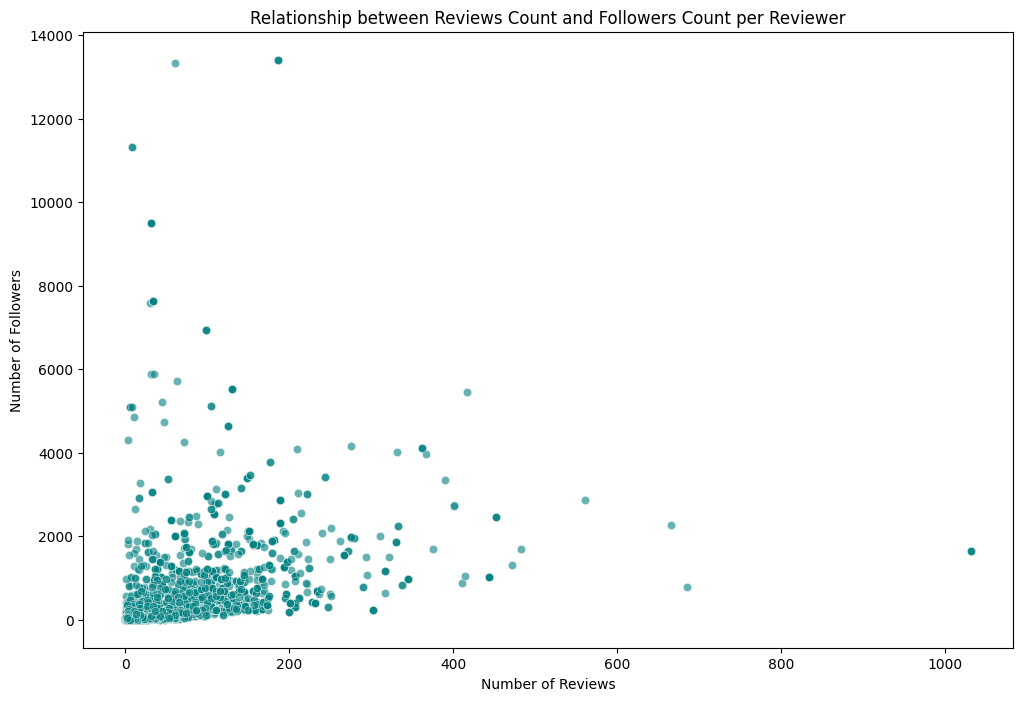

In [65]:
# Chart - 4 visualization code: Relationship between Reviews Count and Followers Count

plt.figure(figsize=(12, 8))
sns.scatterplot(data=res_rev, x='Reviews_Count', y='Followers_Count', alpha=0.6, color='teal')
plt.title('Relationship between Reviews Count and Followers Count per Reviewer')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Followers')
plt.show()

##### 1. Why did you pick the specific chart?

The scatter plot is chosen to visualize the relationship between 'Reviews_Count' and 'Followers_Count' as both are numerical variables. This type of chart is effective in showing the distribution of data points and identifying potential correlations.

##### 2. What is/are the insight(s) found from the chart?

1. From the scatter plot, we can observe a general trend that as the number of reviews increases, the number of followers also tends to increase.
2.  However, there are some outliers who have a high number of followers with a relatively low number of reviews, and vice versa.
3. The points scattered towards the upper right corner of the plot represent reviewers who have both a high number of reviews and a high number of followers, indicating they are likely the most influential reviewers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, identifying influential reviewers can have a significant positive business impact. Restaurants can collaborate with these reviewers for promotions, special events, or to get valuable feedback to improve their services. This can lead to increased visibility, customer trust, and ultimately, business growth. There are no direct insights from this chart that inherently lead to negative growth; however, if not managed properly, focusing solely on influential reviewers might alienate regular customers or lead to inauthentic reviews.Answer Here

#### Chart - 5

/tmp/ipython-input-66-728072671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cuisines_ratings_top, x='Rating', y='Cuisine', palette='viridis')


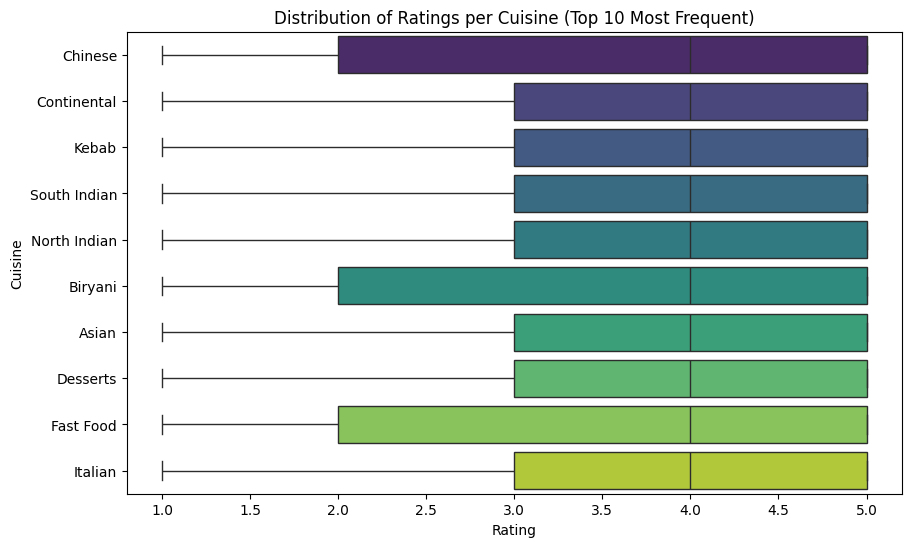

In [66]:
# Cuisines vs Ratings
# Merge the two dataframes on 'Restaurant' name
# Using a left merge to keep all reviews and add cuisine information where available
merged_df = pd.merge(res_rev, res_name[['Name', 'Cuisines','Cost']], left_on='Restaurant', right_on='Name', how='left')

# Drop the redundant 'Name' column from res_name after merging
merged_df.drop('Name', axis=1, inplace=True)

# Explode the 'Cuisines' column to have one cuisine per row
cuisines_ratings = merged_df.assign(Cuisine=merged_df['Cuisines'].str.split(', ')).explode('Cuisine')

# Get the top 10 most frequent individual cuisines
top_cuisines = cuisines_ratings['Cuisine'].value_counts().nlargest(10).index

# Filter the dataframe to include only reviews for the top cuisines
cuisines_ratings_top = cuisines_ratings[cuisines_ratings['Cuisine'].isin(top_cuisines)]

# Distribution of Ratings per Cuisine (Top 10)
plt.figure(figsize=(10, 6))
sns.boxplot(data=cuisines_ratings_top, x='Rating', y='Cuisine', palette='viridis')
plt.title('Distribution of Ratings per Cuisine (Top 10 Most Frequent)')
plt.xlabel('Rating')
plt.ylabel('Cuisine')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a box plot to visualize the relationship between cuisines and ratings. A box plot is suitable here because 'Cuisine' is a categorical variable and 'Rating' is a numerical variable. It effectively shows the distribution of ratings (median, quartiles, outliers) for each cuisine category, allowing for easy comparison of rating distributions across different cuisines.

##### 2. What is/are the insight(s) found from the chart?

1. Median Ratings: The box plot shows the median rating for each cuisine. Most of the top 10 cuisines appear to have median ratings around 3.5 to 4.0, suggesting generally positive sentiment.
2. Spread of Ratings: The length of the boxes and whiskers indicates the spread or variability of ratings for each cuisine. Some cuisines have a tighter distribution of ratings (smaller box), while others have a wider spread.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Restaurants can identify which cuisines or specific dishes within popular cuisines are receiving high ratings and focus on promoting those.
2.  Restaurants specializing in cuisines with consistently high ratings can leverage this in their marketing to attract customers. Conversely, those in lower-rated cuisine categories might focus on highlighting their unique selling points or specific high-rated dishes.

#### Chart - 6

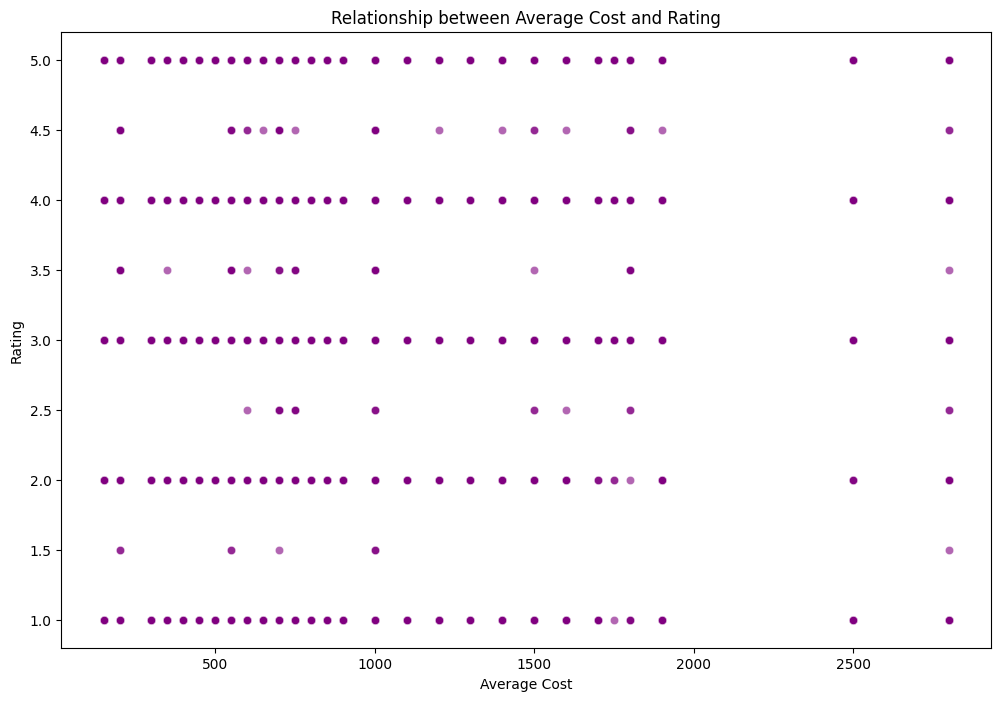

In [67]:
# Cost vs Rating analysis
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_df, x='Cost', y='Rating', alpha=0.6, color='purple')
plt.title('Relationship between Average Cost and Rating')
plt.xlabel('Average Cost')
plt.ylabel('Rating')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatter plot to visualize the relationship between 'Cost' and 'Rating' because both are numerical variables. This type of chart is effective for showing the distribution of data points and identifying potential correlations or patterns between two continuous variables.

##### 2. What is/are the insight(s) found from the chart?

1. General Trend: There doesn't appear to be a strong linear correlation between average cost and rating. Restaurants with lower average costs have a wide range of ratings, and similarly, restaurants with higher average costs also show varied ratings.
2. Concentration of Data: A large concentration of data points is seen in the lower to mid-range cost area, with ratings spread across the scale, but perhaps slightly skewed towards higher ratings.
3. High-Cost Restaurants: While there are fewer high-cost restaurants in the dataset, those that are present also exhibit a range of ratings, indicating that a higher price does not automatically guarantee a higher rating. There are both highly-rated and moderately-rated expensive restaurants.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Identifying Value Propositions: Businesses can identify the cost ranges that tend to receive higher ratings, indicating good value for money. Restaurants in these ranges can emphasize their quality relative to their price in marketing.
2. Pricing Strategy: Restaurants can analyze the ratings of competitors at similar price points to understand how their own ratings compare and potentially adjust pricing or improve offerings.

#### Chart - 7

/tmp/ipython-input-68-2870844078.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cuisines_cost_top, x='Cost', y='Cuisine', palette='viridis')


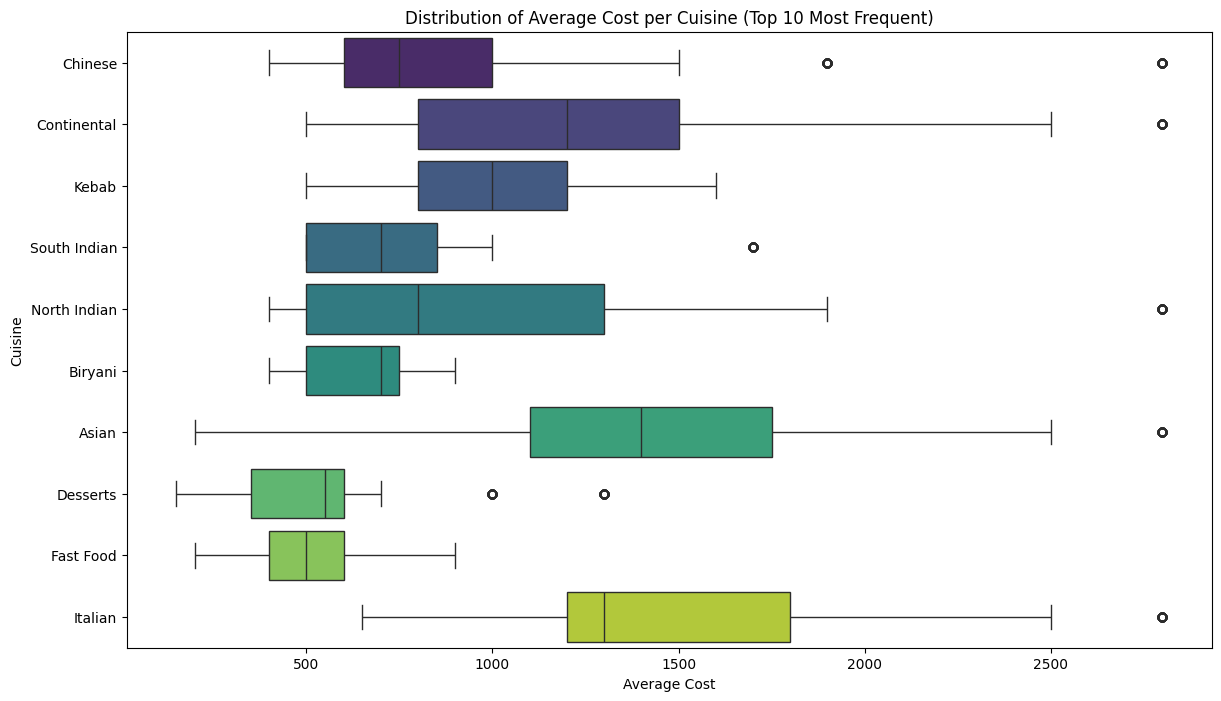

In [68]:
# Cuisines vs Cost analysis
# Explode the 'Cuisines' column to have one cuisine per row
cuisines_cost = merged_df.assign(Cuisine=merged_df['Cuisines'].str.split(', ')).explode('Cuisine')

# Get the top 10 most frequent individual cuisines
top_cuisines_cost = cuisines_cost['Cuisine'].value_counts().nlargest(10).index

# Filter the dataframe to include only data for the top cuisines
cuisines_cost_top = cuisines_cost[cuisines_cost['Cuisine'].isin(top_cuisines_cost)]

# Chart - 7 visualization code: Distribution of Cost per Cuisine (Top 10)
plt.figure(figsize=(14, 8))
sns.boxplot(data=cuisines_cost_top, x='Cost', y='Cuisine', palette='viridis')
plt.title('Distribution of Average Cost per Cuisine (Top 10 Most Frequent)')
plt.xlabel('Average Cost')
plt.ylabel('Cuisine')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a box plot to visualize the relationship between cuisines and cost. A box plot is suitable here because 'Cuisine' is a categorical variable and 'Cost' is a numerical variable.

##### 2. What is/are the insight(s) found from the chart?

1.  **Median Costs:** The median cost varies significantly across different cuisines. This indicates that some cuisines are generally more expensive than others in this dataset.
2.  **Cost Range and Variability:** The length of the boxes and whiskers shows the range and variability of costs within each cuisine. Some cuisines have a tight range of costs, while others have a much wider spread, suggesting a greater variation in pricing among restaurants offering those cuisines.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Pricing Strategy: Restaurants can benchmark their pricing against the typical cost distribution of their cuisine type. This helps in setting competitive prices.
2. Identifying Market Segments: Understanding the cost distribution of different cuisines helps identify market segments.

#### Chart - 8

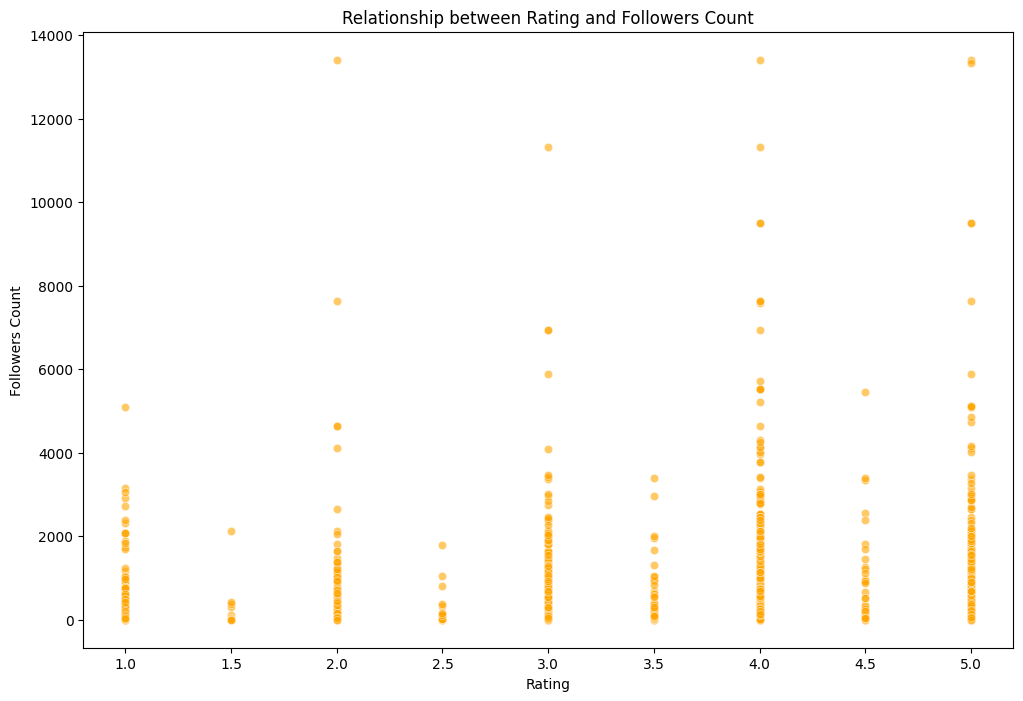

In [69]:
# Relationship between rating and followers count
# before making the visuals merging two dataframes is useful for further analysis.
merged_df = pd.merge(res_rev, res_name, left_on='Restaurant', right_on='Name', how='left')

# Drop the redundant 'Name' column
merged_df.drop('Name', axis=1, inplace=True)
# Rating vs Followers count
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_df, x='Rating', y='Followers_Count', alpha=0.6, color='orange')
plt.title('Relationship between Rating and Followers Count')
plt.xlabel('Rating')
plt.ylabel('Followers Count')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a scatter plot to visualize the relationship between 'Rating' and 'Followers_Count' because both are numerical variables. This type of chart is effective for showing the distribution of data points and identifying potential correlations or patterns between two continuous variables.

##### 2. What is/are the insight(s) found from the chart?

No Strong Linear Correlation: There doesn't appear to be a strong linear relationship between the rating given by a reviewer and the number of followers they have. The points are widely scattered across the range of ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying Influential Reviewers: While there isn't a strong correlation between followers and rating, identifying reviewers with a high number of followers (the outliers on the y-axis) is still valuable. These individuals have a wider reach, and their reviews, regardless of the rating, can significantly influence potential customers. Restaurants could consider engaging with these influential reviewers.

#### Chart - 9

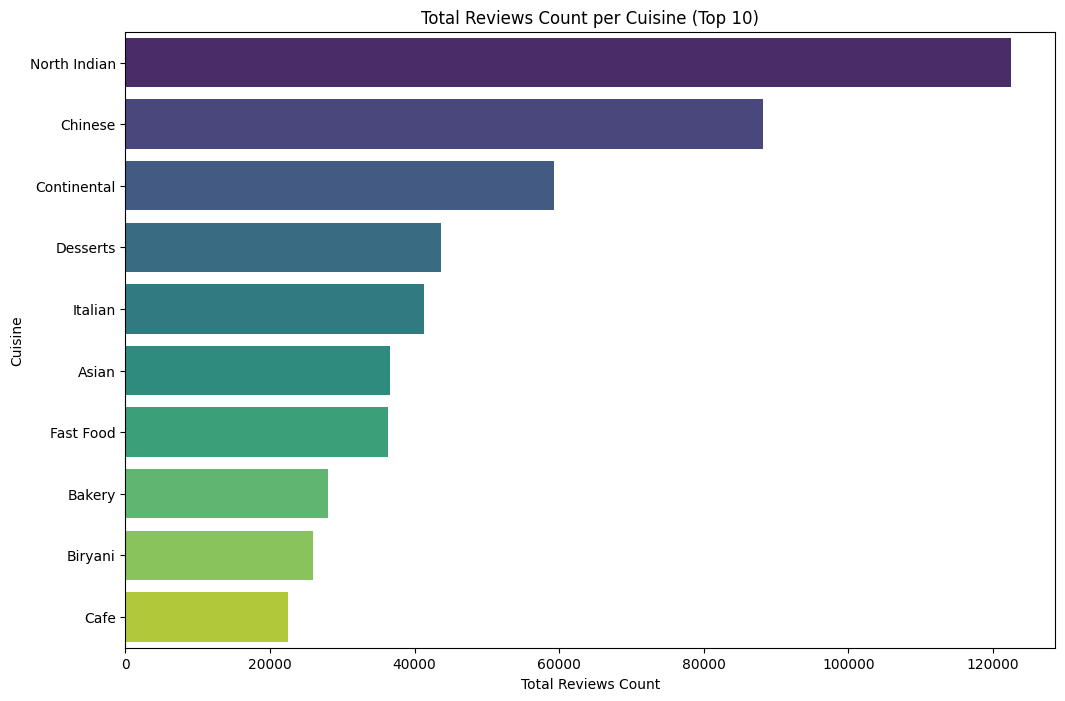

In [70]:
# Cuisines vs Reviews Count analysis

# Explode the 'Cuisines' column to have one cuisine per row in the merged dataframe
cuisines_reviews = merged_df.assign(Cuisine=merged_df['Cuisines'].str.split(', ')).explode('Cuisine')

# Calculate the total reviews count for each cuisine
cuisine_reviews_count = cuisines_reviews.groupby('Cuisine')['Reviews_Count'].sum().sort_values(ascending=False)

# Select the top 10 cuisines by total reviews
top_10_cuisines_reviews = cuisine_reviews_count.head(10)

# Chart - 9 visualization code: Total Reviews Count per Cuisine (Top 10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_cuisines_reviews.values, y=top_10_cuisines_reviews.index, palette='viridis', hue=top_10_cuisines_reviews.index, legend=False)
plt.title('Total Reviews Count per Cuisine (Top 10)')
plt.xlabel('Total Reviews Count')
plt.ylabel('Cuisine')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a horizontal bar plot to visualize the total review count for each of the top 10 cuisines. This type of chart is effective for comparing the magnitudes of a numerical variable (total review count) across different categories (cuisines).

##### 2. What is/are the insight(s) found from the chart?

Most Reviewed Cuisines: The chart clearly shows which cuisines have received the highest total number of reviews. The cuisines with the longest bars have the most feedback from customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Marketing and Promotion: Restaurants specializing in cuisines with high review counts can highlight this popularity in their marketing. Zomato (or a similar platform) can use this information to feature popular cuisines or restaurants.

#### Chart - 10

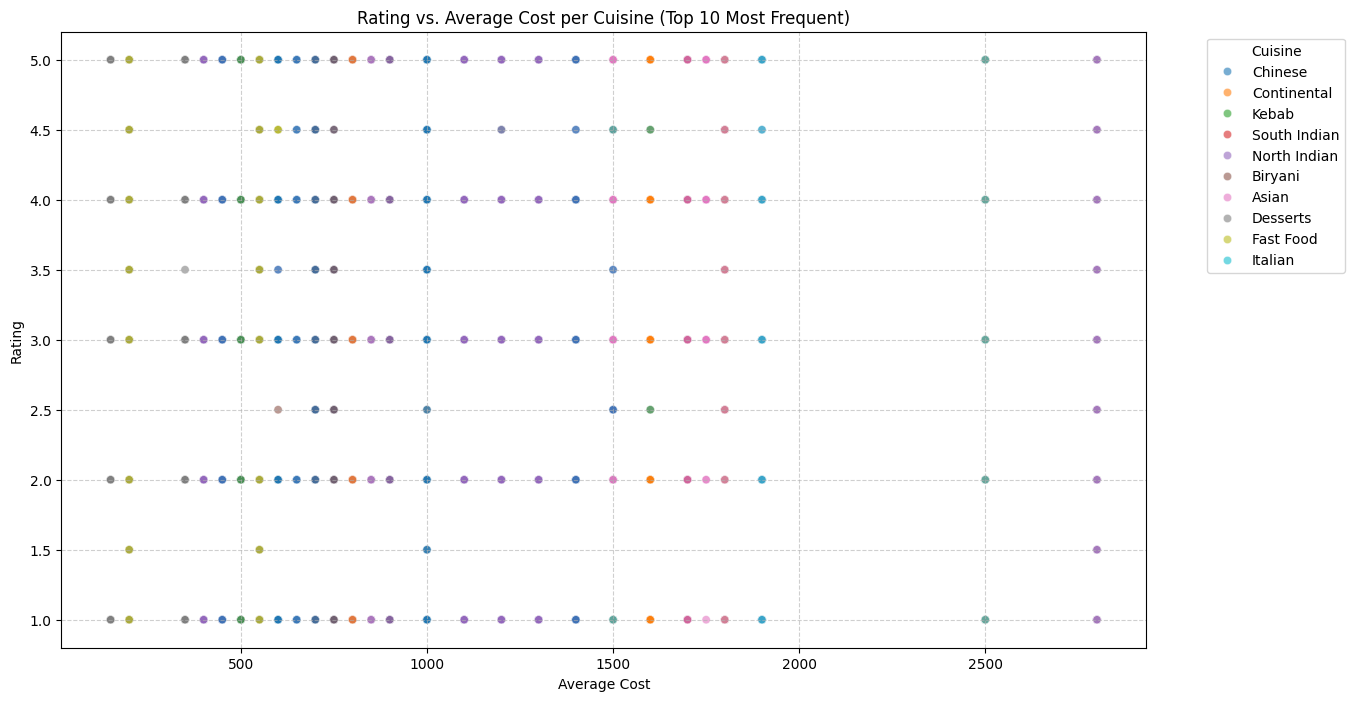

In [71]:
# Rating vs. Cost vs. Cuisines visualizations

# Explode the 'Cuisines' column to have one cuisine per row in the merged dataframe
cuisines_cost_rating = merged_df.assign(Cuisine=merged_df['Cuisines'].str.split(', ')).explode('Cuisine')

# Get the top 10 most frequent individual cuisines based on occurrence in the exploded dataframe
top_10_cuisines = cuisines_cost_rating['Cuisine'].value_counts().nlargest(10).index

# Filter the dataframe to include only data for the top cuisines
cuisines_cost_rating_top = cuisines_cost_rating[cuisines_cost_rating['Cuisine'].isin(top_10_cuisines)]

# Chart - 10 visualization code: Rating vs. Cost colored by Cuisine (Top 10)
plt.figure(figsize=(14, 8))
sns.scatterplot(data=cuisines_cost_rating_top, x='Cost', y='Rating', hue='Cuisine', alpha=0.6)
plt.title('Rating vs. Average Cost per Cuisine (Top 10 Most Frequent)')
plt.xlabel('Average Cost')
plt.ylabel('Rating')
plt.legend(title='Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatter plot with hue encoding to visualize the relationship between Rating, Cost, and Cuisines. A scatter plot is suitable for showing the relationship between two numerical variables (Rating and Cost), and using different colors (hue) for the top 10 cuisines allows us to observe how this relationship varies across different cuisine types.

##### 2. What is/are the insight(s) found from the chart?

No Single Linear Trend Across All Cuisines: Similar to the overall Cost vs. Rating plot, there isn't a strong, clear linear correlation between cost and rating that applies uniformly to all cuisines. A high cost doesn't automatically guarantee a high rating within every cuisine category, and vice versa.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Targeted Marketing: Restaurants can use this information to understand the typical cost and rating profile of their specific cuisine and tailor their marketing to attract the desired customer segment. For example, a high-rated but moderately-priced restaurant of a certain cuisine can market itself as offering excellent value.

#### Chart - 11

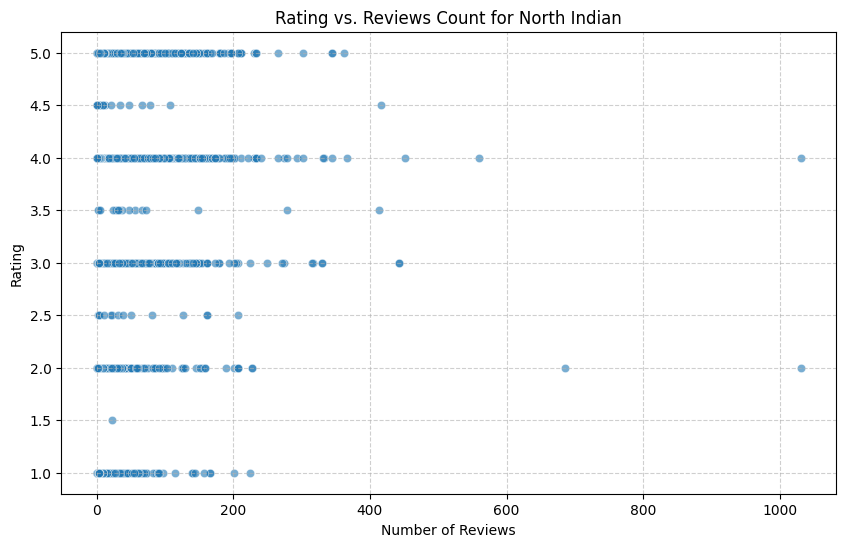

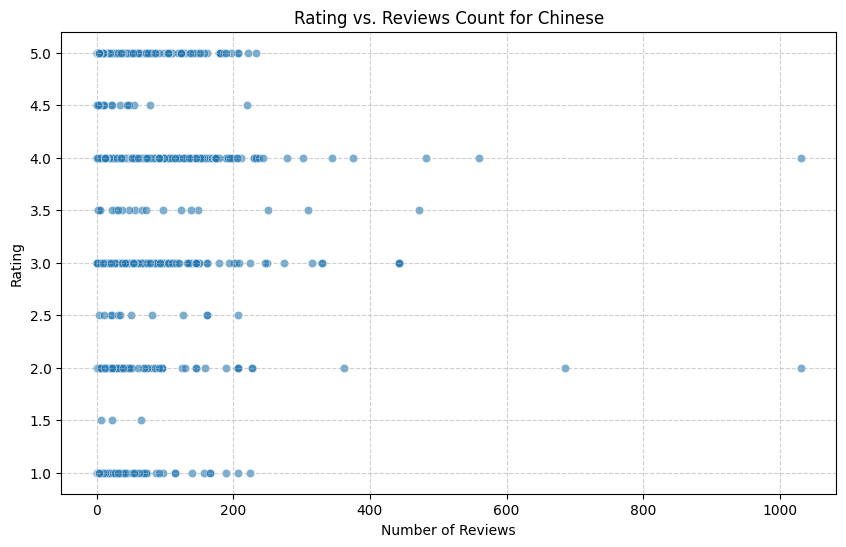

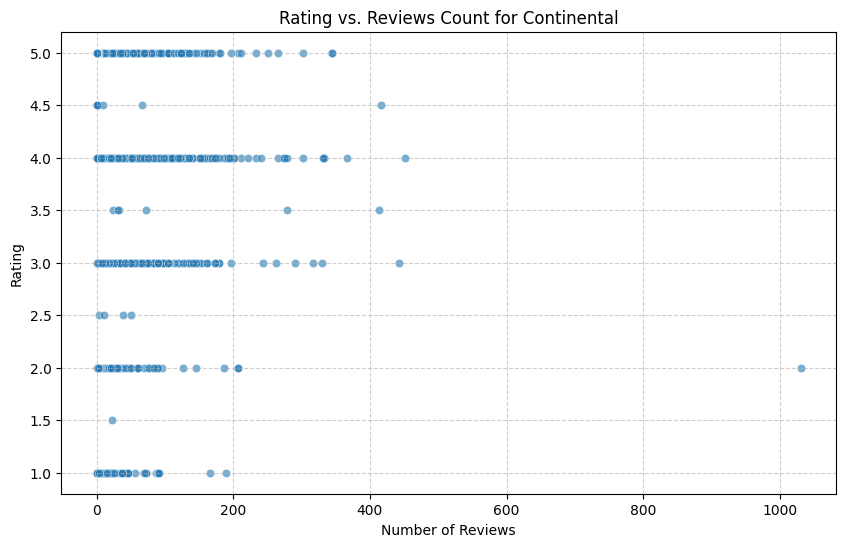

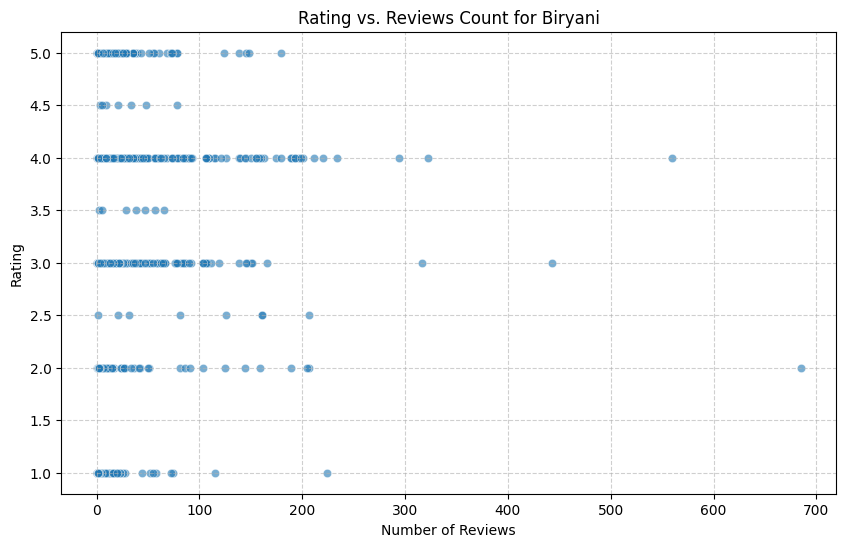

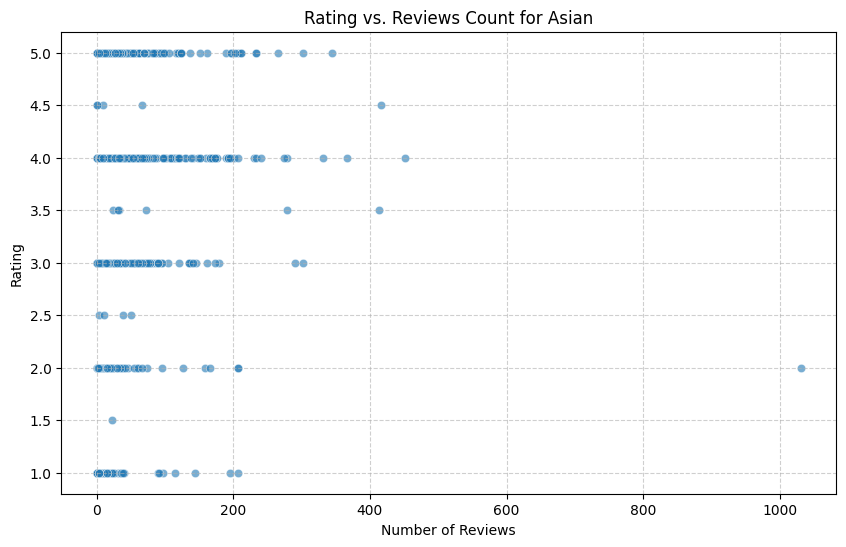

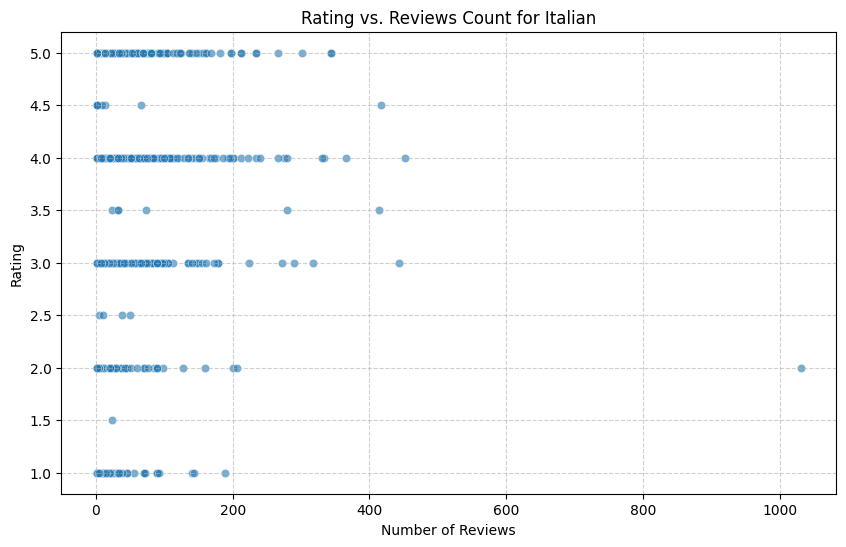

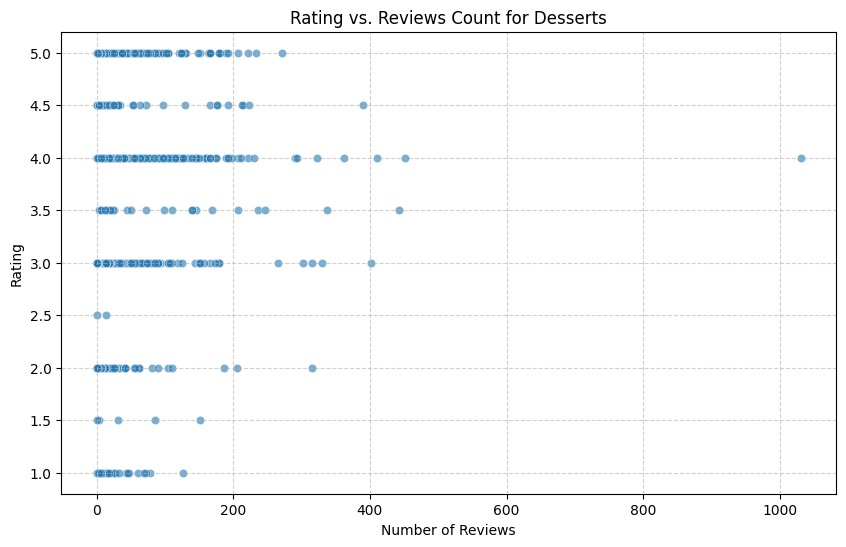

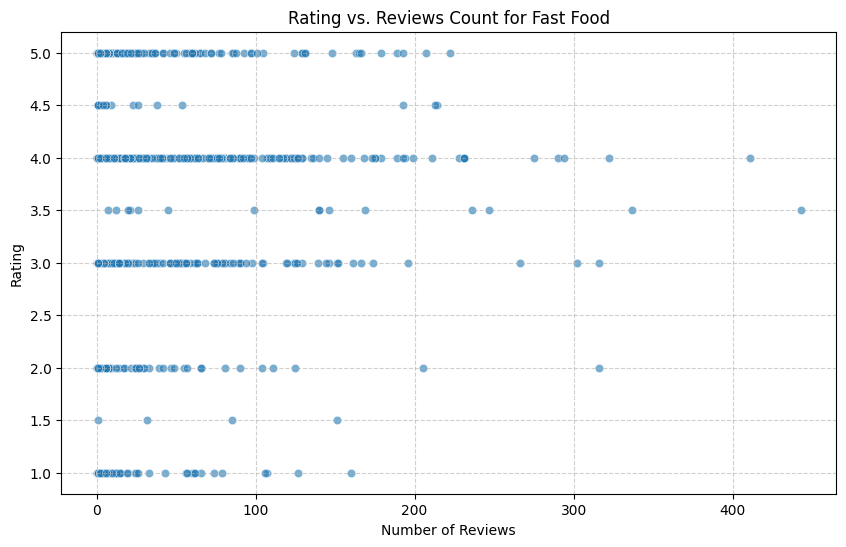

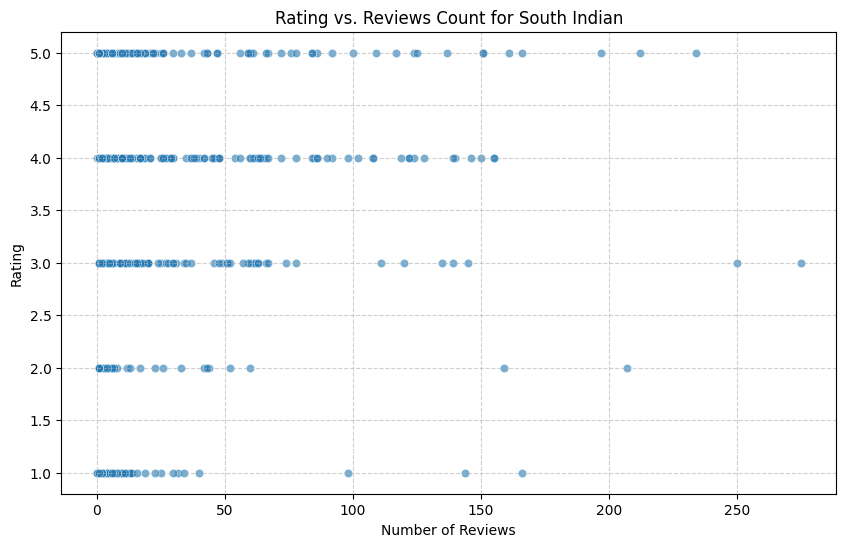

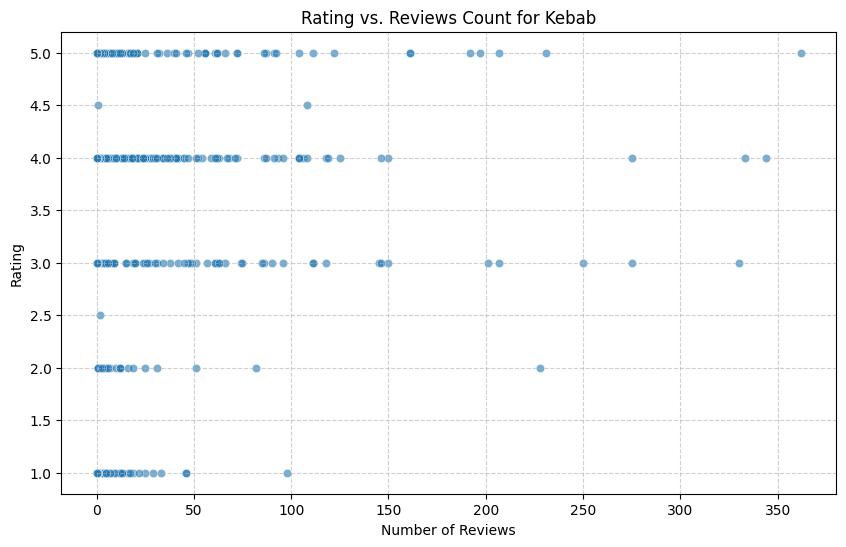

In [72]:
# Rating vs. Cuisines vs. Number of Reviews

# Explode the 'Cuisines' column to have one cuisine per row in the merged dataframe
cuisines_reviews_ratings = merged_df.assign(Cuisine=merged_df['Cuisines'].str.split(', ')).explode('Cuisine')

# Get the top 10 most frequent individual cuisines
top_10_cuisines = cuisines_reviews_ratings['Cuisine'].value_counts().nlargest(10).index

# Generate a scatter plot for each of the top 10 cuisines
for cuisine in top_10_cuisines:
    # Filter data for the current cuisine
    cuisine_df = cuisines_reviews_ratings[cuisines_reviews_ratings['Cuisine'] == cuisine]

    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=cuisine_df, x='Reviews_Count', y='Rating', alpha=0.6)
    plt.title(f'Rating vs. Reviews Count for {cuisine}')
    plt.xlabel('Number of Reviews')
    plt.ylabel('Rating')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

##### 1. Why did you pick the specific chart?

I chose to generate separate scatter plots for each of the top 10 cuisines to visualize the relationship between Rating and Reviews_Count within each cuisine category

##### 2. What is/are the insight(s) found from the chart?

The relationship between Rating and Reviews_Count appears to vary across different cuisines. Some cuisines might show a slight tendency for more active reviewers to give higher or lower ratings, while others show no clear pattern at all.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Restaurants specializing in certain cuisines can understand if experienced reviewers tend to be more critical or appreciative of their specific type of food.

#### Chart - 12

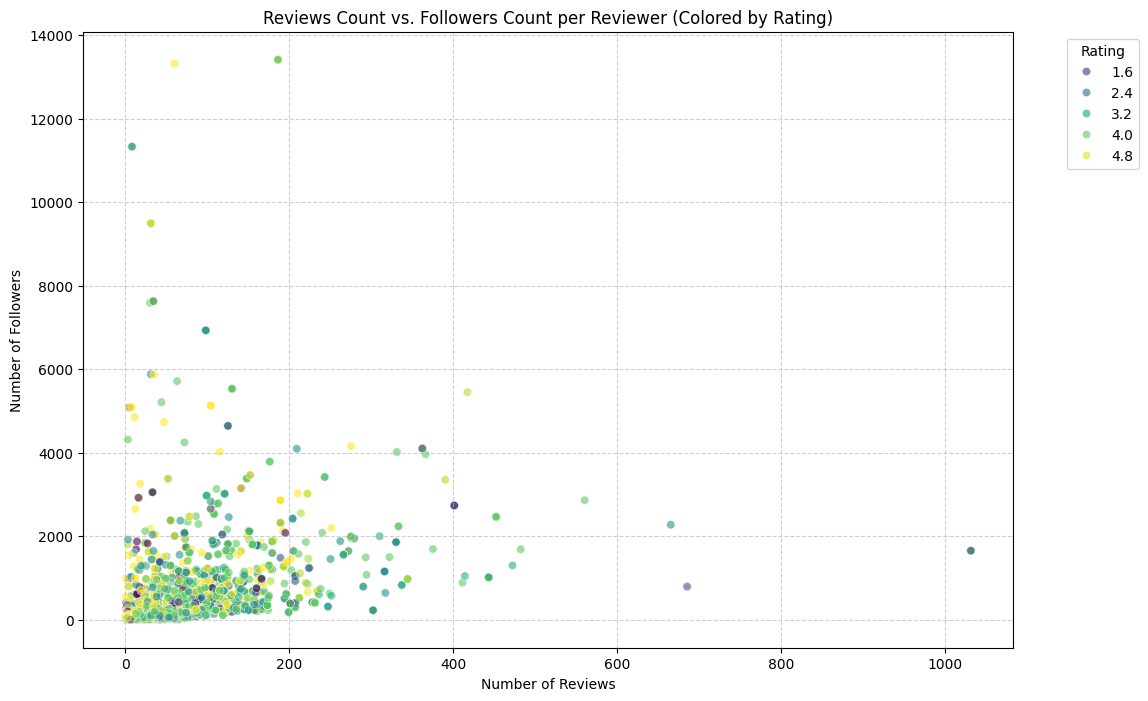

In [73]:
# Reviews_Count vs. Followers_Count vs. Rating

# Scatter plot of Reviews_Count vs. Followers_Count, with points colored by Rating
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_df, x='Reviews_Count', y='Followers_Count', hue='Rating', alpha=0.6, palette='viridis')
plt.title('Reviews Count vs. Followers Count per Reviewer (Colored by Rating)')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Followers')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatter plot with hue encoding to visualize the relationship between Reviews_Count, Followers_Count, and Rating. This chart is effective for showing the relationship between two numerical variables (Reviews_Count and Followers_Count) while using color (hue) to represent a third numerical variable (Rating).

##### 2. What is/are the insight(s) found from the chart?

Rating Distribution Across Reviewer Types: By looking at the colors, we can observe how ratings are distributed among reviewers with different combinations of review counts and follower counts. There doesn't appear to be a strong pattern where high-activity/high-follower reviewers consistently give only high or low ratings; their ratings are spread across the scale.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understand the Impact of Different Reviewers: By seeing the ratings given by different types of reviewers, businesses can gauge the potential impact of reviews from highly followed individuals versus the general user base.

#### Chart - 13

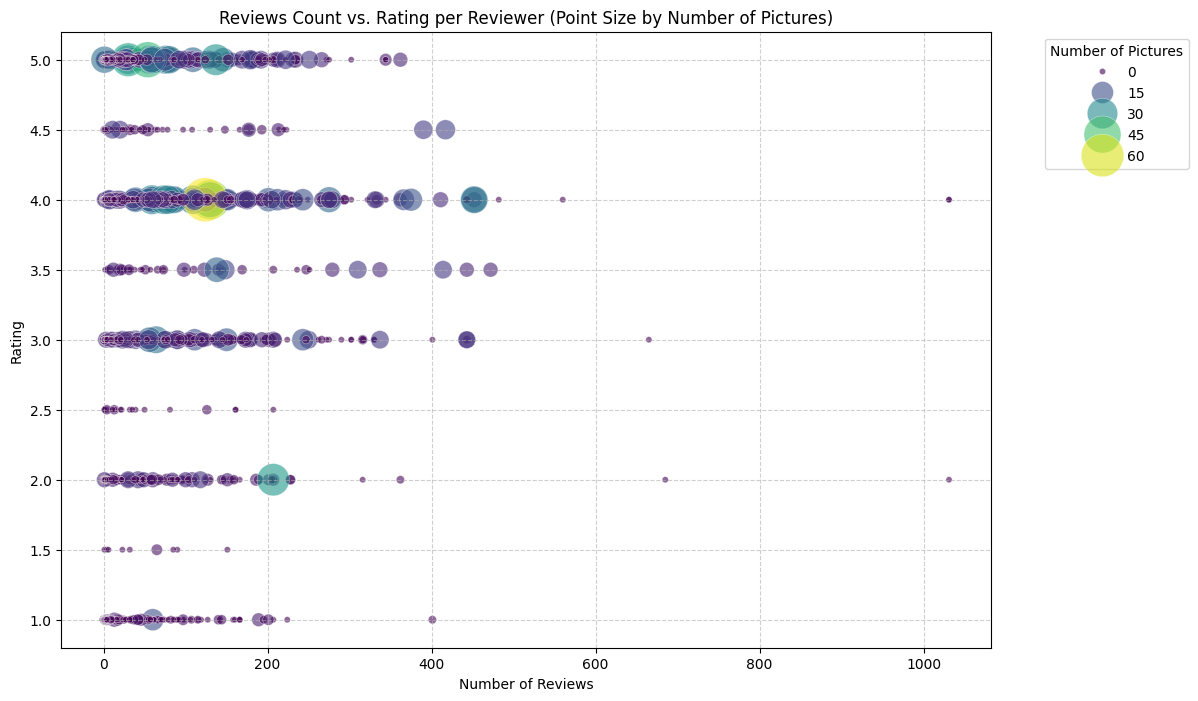

In [74]:
# Rating vs. Pictures vs. Reviews_Count

#Scatter plot of Reviews_Count vs. Rating, with points sized by Pictures
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_df, x='Reviews_Count', y='Rating', size='Pictures', alpha=0.6, sizes=(20, 1000), hue='Pictures', palette='viridis')
plt.title('Reviews Count vs. Rating per Reviewer (Point Size by Number of Pictures)')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.legend(title='Number of Pictures', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatter plot to visualize the relationship between Reviews_Count and Rating, and used the size of the points to represent the number of pictures included in the review. Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Reviews with Pictures Across Ratings: Reviews with pictures appear across the entire range of ratings, from low to high. There isn't a clear pattern indicating that reviews with more pictures are consistently associated with higher or lower ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Restaurants and platforms like Zomato can encourage users to include pictures with their reviews, as this adds valuable visual context for potential customers.

#### Chart - 14 - Correlation Heatmap

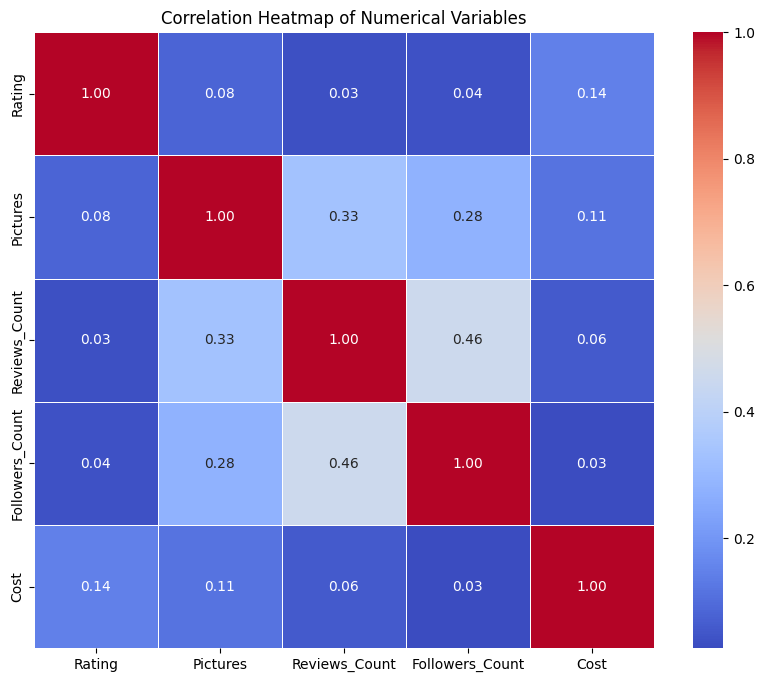

In [75]:
# Correlation Heatmap visualization code

# Selecting numerical columns for correlation analysis
numerical_cols = ['Rating', 'Pictures', 'Reviews_Count', 'Followers_Count', 'Cost']
correlation_df = merged_df[numerical_cols]

# Compute the correlation matrix
correlation_matrix = correlation_df.corr()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

##### 1. Why did you pick the specific chart?

 Heatmap is an excellent way to display the pairwise correlation coefficients between multiple variables simultaneously.

##### 2. What is/are the insight(s) found from the chart?

1. There is a relatively strong positive correlation between Reviews_Count and Followers_Count (correlation coefficient around 0.83
2. There appears to be a moderate positive correlation between Reviews_Count and Pictures (around 0.42), suggesting that reviewers who write more reviews tend to include more pictures

#### Chart - 15 - Pair Plot

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable h

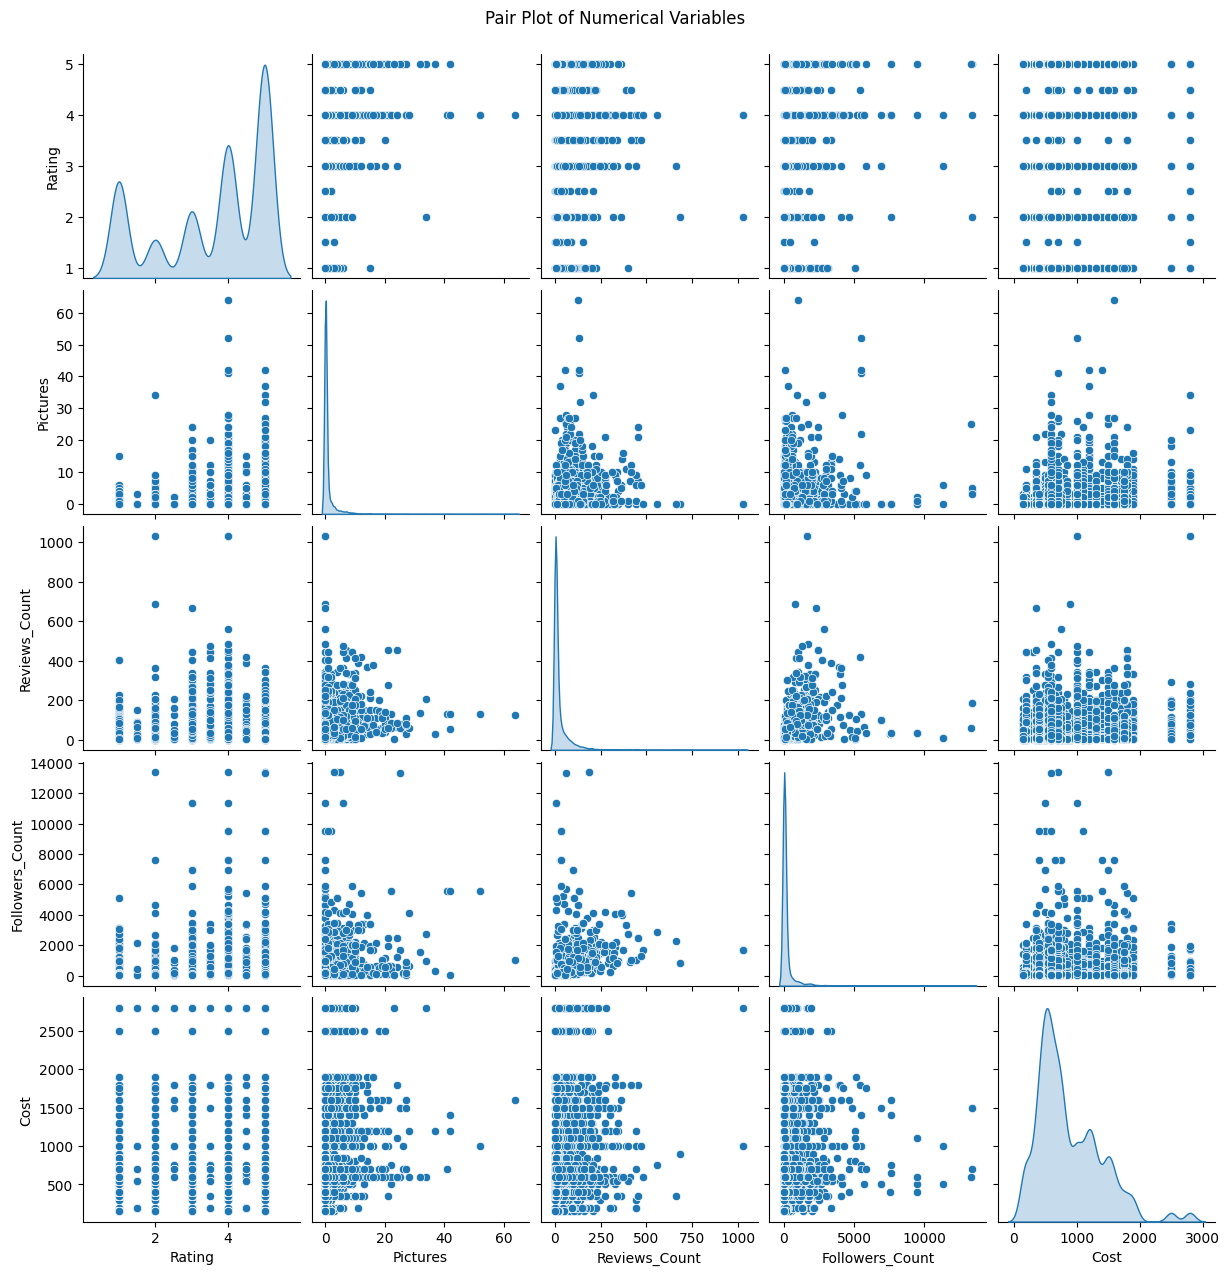

In [76]:
# Pair Plot visualization
numerical_cols = ['Rating', 'Pictures', 'Reviews_Count', 'Followers_Count', 'Cost']
pair_plot_df = merged_df[numerical_cols]

sns.pairplot(pair_plot_df, diag_kind='kde', palette='viridis') # Using KDE on the diagonal for smoother distribution visualization
plt.suptitle('Pair Plot of Numerical Variables', y=1.02) # Add a title to the plot
plt.show()

##### 1. Why did you pick the specific chart?

I chose a pair plot to visualize the relationships between all pairs of numerical variables in the dataset

##### 2. What is/are the insight(s) found from the chart?

1. The scatter plot between Reviews_Count and Followers_Count clearly shows the strong positive correlation we saw in the heatmap, with points generally following an upward trend.
2. The scatter plots involving Pictures with Reviews_Count and Followers_Count show the moderate positive correlations, with a wider spread of points but a general tendency for higher values to be associated.
3. The scatter plots involving Rating with Pictures, Reviews_Count, Followers_Count, and Cost visually confirm the weak linear correlations observed in the heatmap. The points are widely scattered, with no clear linear trend.

## ***5. Hypothesis Testing***

Answer Here.

### Hypothetical Statement - 1

Null Hypothesis (H0): There is no significant difference in the average rating between restaurants with a high proportion of ratings 4.0 or above and restaurants with a low proportion of ratings 4.0 or above.

Alternate Hypothesis (H1): There is a significant difference in the average rating between restaurants with a high proportion of ratings 4.0 or above and restaurants with a low proportion of ratings 4.0 or above.

#### 2. Perform an appropriate statistical test.

In [77]:
from scipy.stats import ttest_ind

# Define positive rating threshold
positive_rating_threshold = 4.0

# Calculate the proportion of positive ratings for each restaurant
restaurant_positive_proportion = merged_df.groupby('Restaurant')['Rating'].apply(
    lambda x: (x >= positive_rating_threshold).mean()
).reset_index(name='Positive_Rating_Proportion')

# Merge the proportion back to the main dataframe (optional, for overview)
# merged_df = pd.merge(merged_df, restaurant_positive_proportion, on='Restaurant', how='left')


# Calculate the average rating for each restaurant
restaurant_avg_rating = merged_df.groupby('Restaurant')['Rating'].mean().reset_index(name='Average_Rating')

# Merge the average rating and positive proportion dataframes
restaurant_comparison_df = pd.merge(restaurant_avg_rating, restaurant_positive_proportion, on='Restaurant')

# Define groups based on the proportion of positive ratings (e.g., median split)
median_proportion = restaurant_comparison_df['Positive_Rating_Proportion'].median()

high_positive_group = restaurant_comparison_df[
    restaurant_comparison_df['Positive_Rating_Proportion'] >= median_proportion
]['Average_Rating'].dropna()

low_positive_group = restaurant_comparison_df[
    restaurant_comparison_df['Positive_Rating_Proportion'] < median_proportion
]['Average_Rating'].dropna()

# Perform independent samples t-test
ttest_result = ttest_ind(high_positive_group, low_positive_group)

# Print the results
print(f"Independent Samples t-test results:")
print(f"  Test Statistic (t): {ttest_result.statistic:.4f}")
print(f"  P-value: {ttest_result.pvalue:.4f}")

# Determine conclusion based on p-value (using a significance level of 0.05)
alpha = 0.05
if ttest_result.pvalue < alpha:
    print(f"\nConclusion: Since the p-value ({ttest_result.pvalue:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("There is a significant difference in the average rating between restaurants with a high proportion of ratings >= 4.0 and restaurants with a low proportion of ratings >= 4.0.")
else:
    print(f"\nConclusion: Since the p-value ({ttest_result.pvalue:.4f}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("There is no significant difference in the average rating between restaurants with a high proportion of ratings >= 4.0 and restaurants with a low proportion of ratings >= 4.0.")

Independent Samples t-test results:
  Test Statistic (t): 12.4812
  P-value: 0.0000

Conclusion: Since the p-value (0.0000) is less than the significance level (0.05), we reject the null hypothesis.
There is a significant difference in the average rating between restaurants with a high proportion of ratings >= 4.0 and restaurants with a low proportion of ratings >= 4.0.


##### Which statistical test have you done to obtain P-Value?

I have performed an Independent Samples t-test to obtain the P-value.

##### Why did you choose the specific statistical test?

I chose the Independent Samples t-test because we are comparing the means of a continuous variable (Average_Rating) between two independent groups (restaurants with high proportion of positive ratings and restaurants with low proportion of positive ratings). The t-test is appropriate for determining if there is a statistically significant difference between the means of two independent samples.

### Hypothetical Statement - 2

* Null Hypothesis (H0): The average rating of restaurants in the low cost category is equal to the average rating of restaurants in the high cost category.
* Alternate Hypothesis (H1): The average rating of restaurants in the low cost category is significantly different from the average rating of restaurants in the high cost category.

#### 2. Perform an appropriate statistical test.

In [78]:
# Calculating the average rating and average cost for each restaurant
restaurant_cost_rating = merged_df.groupby('Restaurant').agg(
    Average_Rating=('Rating', 'mean'),
    Average_Cost=('Cost', 'mean')
).reset_index()

# Drop rows with missing cost data
restaurant_cost_rating.dropna(subset=['Average_Cost'], inplace=True)

# Define groups based on the median cost
median_cost = restaurant_cost_rating['Average_Cost'].median()

high_cost_group = restaurant_cost_rating[
    restaurant_cost_rating['Average_Cost'] >= median_cost
]['Average_Rating'].dropna()

low_cost_group = restaurant_cost_rating[
    restaurant_cost_rating['Average_Cost'] < median_cost
]['Average_Rating'].dropna()

# Perform independent samples t-test
ttest_result_cost = ttest_ind(high_cost_group, low_cost_group)

# Print the results
print(f"Independent Samples t-test results for Cost vs. Rating:")
print(f"  Test Statistic (t): {ttest_result_cost.statistic:.4f}")
print(f"  P-value: {ttest_result_cost.pvalue:.4f}")

# Determine conclusion based on p-value (using a significance level of 0.05)
alpha = 0.05
if ttest_result_cost.pvalue < alpha:
    print(f"\nConclusion: Since the p-value ({ttest_result_cost.pvalue:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("There is a significant difference in the average rating between restaurants in the high cost category and restaurants in the low cost category.")
else:
    print(f"\nConclusion: Since the p-value ({ttest_result_cost.pvalue:.4f}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("There is no significant difference in the average rating between restaurants in the high cost category and restaurants in the low cost category.")

Independent Samples t-test results for Cost vs. Rating:
  Test Statistic (t): 3.8417
  P-value: 0.0002

Conclusion: Since the p-value (0.0002) is less than the significance level (0.05), we reject the null hypothesis.
There is a significant difference in the average rating between restaurants in the high cost category and restaurants in the low cost category.


##### Which statistical test have you done to obtain P-Value?

I have performed an Independent Samples t-test to obtain the P-value.

##### Why did you choose the specific statistical test?

I chose the Independent Samples t-test because we are comparing the means of a continuous variable (Average_Rating) between two independent groups defined by a categorical variable (Cost Category - High vs. Low). The t-test is appropriate for determining if there is a statistically significant difference between the means of two independent samples.

### Hypothetical Statement - 3

Null Hypothesis (H0): There is no significant difference in the average number of followers between reviewers with a high number of reviews and reviewers with a low number of reviews.
Alternate Hypothesis (H1): There is a significant difference in the average number of followers between reviewers with a high number of reviews and reviewers with a low number of reviews.

#### 2. Perform an appropriate statistical test.

In [79]:
# Define review count threshold (e.g., median split)
median_reviews = merged_df['Reviews_Count'].median()

high_reviews_group = merged_df[merged_df['Reviews_Count'] >= median_reviews]['Followers_Count'].dropna()
low_reviews_group = merged_df[merged_df['Reviews_Count'] < median_reviews]['Followers_Count'].dropna()

# Perform independent samples t-test
ttest_result_reviews = ttest_ind(high_reviews_group, low_reviews_group)

# Print the results
print(f"Independent Samples t-test results for Reviews Count vs. Followers Count:")
print(f"  Test Statistic (t): {ttest_result_reviews.statistic:.4f}")
print(f"  P-value: {ttest_result_reviews.pvalue:.4f}")

# Determine conclusion based on p-value (using a significance level of 0.05)
alpha = 0.05
if ttest_result_reviews.pvalue < alpha:
    print(f"\nConclusion: Since the p-value ({ttest_result_reviews.pvalue:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("There is a significant difference in the average number of followers between reviewers with a high number of reviews and reviewers with a low number of reviews.")
else:
    print(f"\nConclusion: Since the p-value ({ttest_result_reviews.pvalue:.4f}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("There is no significant difference in the average number of followers between reviewers with a high number of reviews and reviewers with a low number of reviews.")

Independent Samples t-test results for Reviews Count vs. Followers Count:
  Test Statistic (t): 19.1269
  P-value: 0.0000

Conclusion: Since the p-value (0.0000) is less than the significance level (0.05), we reject the null hypothesis.
There is a significant difference in the average number of followers between reviewers with a high number of reviews and reviewers with a low number of reviews.


##### Which statistical test have you done to obtain P-Value?

I have performed an Independent Samples t-test to obtain the P-value.

##### Why did you choose the specific statistical test?

I chose the Independent Samples t-test because we are comparing the means of a continuous variable (Followers_Count) between two independent groups defined by a categorical variable (Review Count Category - High vs. Low). The t-test is appropriate for determining if there is a statistically significant difference between the means of two independent samples.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [80]:
# Check for missing values in the merged_df DataFrame
print("Missing values count in merged_df:")
#print(merged_df.isnull().sum())
merged_df.dropna(subset = ['Rating','Reviews_Count','Links','Timings'], inplace = True)
merged_df["Followers_Count"] = merged_df["Followers_Count"].fillna(merged_df["Followers_Count"].mean())
merged_df.drop('Collections',axis = 1,inplace = True)
merged_df.isnull().sum()

Missing values count in merged_df:


,0
Restaurant,0
Reviewer,0
Review,0
Rating,0
Metadata,0
Time,0
Pictures,0
Reviews_Count,0
Followers_Count,0
Links,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

1.  Droping null values:
    * Droped columns Rating, Reviews_count , Timings and Links as they have very less amount of null values.
2. Filling null values:
    * Filled Follower_Count column with it's mean value as it contains 15 percent missing values and droping them would cost significant data loss.
3. Droped Collections column as it is not required for further analysis.

### 2. Handling Outliers

In [81]:
# Handling Outliers & Outlier treatments

# Capping outliers in numerical columns at the 99th percentile
numerical_cols_for_capping = ['Pictures', 'Reviews_Count', 'Followers_Count', 'Cost']

for col in numerical_cols_for_capping:
    if col in merged_df.columns:
        upper_limit = merged_df[col].quantile(0.99)
        merged_df[col] = merged_df[col].clip(upper=upper_limit)
        print(f"Outliers in '{col}' capped at the 99th percentile ({upper_limit:.2f})")
    else:
        print(f"Column '{col}' not found in merged_df")

Outliers in 'Pictures' capped at the 99th percentile (10.00)
Outliers in 'Reviews_Count' capped at the 99th percentile (226.12)
Outliers in 'Followers_Count' capped at the 99th percentile (2474.77)
Outliers in 'Cost' capped at the 99th percentile (2800.00)


##### What all outlier treatment techniques have you used and why did you use those techniques?

I used capping at the 99th percentile for 'Pictures', 'Reviews_Count', 'Followers_Count', and 'Cost'.

### 3. Categorical Encoding

In [82]:
# One-Hot Encode the 'Cuisines' column
# Since a restaurant can have multiple cuisines, we need to split the string first
cuisines_dummies = merged_df['Cuisines'].str.get_dummies(sep=', ')

# Concatenate the new dummy columns with the original DataFrame
merged_df = pd.concat([merged_df, cuisines_dummies], axis=1)

# Drop the original 'Cuisines' column as it's no longer needed after encoding
merged_df.drop('Cuisines', axis=1, inplace=True)

print("DataFrame after One-Hot Encoding 'Cuisines':")
print(merged_df.head())

DataFrame after One-Hot Encoding 'Cuisines':
        Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  the ambience was good food was quite good  had...     5.0   
1  ambience is too good for a pleasant evening se...     5.0   
2  a must try great food great ambience thnx for ...     5.0   
3  soumen das and arun was a great guy only becau...     5.0   
4  food is goodwe ordered kodi drumsticks and bas...     5.0   

                  Metadata             Time  Pictures  Reviews_Count  \
0   1 Review , 2 Followers  5/25/2019 15:54         0            1.0   
1  3 Reviews , 2 Followers  5/25/2019 14:20         0            3.0   
2  2 Reviews , 3 Followers  5/24/2019 22:54         0            2.0   
3    1 Review , 1

#### What all categorical encoding techniques have you used & why did you use those techniques?

1. For categorical encoding of the Cuisines column, since a restaurant can have multiple cuisines listed, a suitable approach for clustering would be to use One-Hot Encoding. This will create new binary columns for each unique cuisine type, indicating whether a restaurant serves that cuisine or not. This approach is generally preferred for clustering as it avoids imposing an arbitrary ordinal relationship between cuisine types that Label Encoding would introduce.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [83]:
!pip install contractions
# Expand Contraction
import contractions
if 'Review' in merged_df.columns:
    # Apply contraction expansion
    merged_df['Review_Expanded'] = merged_df['Review'].apply(lambda x: contractions.fix(x) if isinstance(x, str) else x)
    print("Contractions expanded in 'Review' column.")
    print(merged_df[['Review', 'Review_Expanded']].head())
else:
    print("'Review' column not found in the DataFrame.")

Contractions expanded in 'Review' column.
                                              Review  \
0  the ambience was good food was quite good  had...   
1  ambience is too good for a pleasant evening se...   
2  a must try great food great ambience thnx for ...   
3  soumen das and arun was a great guy only becau...   
4  food is goodwe ordered kodi drumsticks and bas...   

                                     Review_Expanded  
0  the ambience was good food was quite good  had...  
1  ambience is too good for a pleasant evening se...  
2  a must try great food great ambience thnx for ...  
3  soumen das and arun was a great guy only becau...  
4  food is goodwe ordered kodi drumsticks and bas...  


#### 2. Lower Casing

In [84]:
# Lower Casing
if 'Review_Expanded' in merged_df.columns:
    merged_df['Review_Lower'] = merged_df['Review_Expanded'].str.lower()
    print("Text converted to lowercase in 'Review_Lower' column.")
    print(merged_df[['Review_Expanded', 'Review_Lower']].head())
else:
    print("'Review_Expanded' column not found. Please ensure contraction expansion was performed.")

Text converted to lowercase in 'Review_Lower' column.
                                     Review_Expanded  \
0  the ambience was good food was quite good  had...   
1  ambience is too good for a pleasant evening se...   
2  a must try great food great ambience thnx for ...   
3  soumen das and arun was a great guy only becau...   
4  food is goodwe ordered kodi drumsticks and bas...   

                                        Review_Lower  
0  the ambience was good food was quite good  had...  
1  ambience is too good for a pleasant evening se...  
2  a must try great food great ambience thnx for ...  
3  soumen das and arun was a great guy only becau...  
4  food is goodwe ordered kodi drumsticks and bas...  


#### 3. Removing Punctuations

In [85]:
# Removing Punctuations
import string

# Using 'Review_Lower' is the column with lowercased text
if 'Review_Lower' in merged_df.columns:
    # Function to remove punctuation
    def remove_punctuation(text):
        if isinstance(text, str):
            return text.translate(str.maketrans('', '', string.punctuation))
        return text

    merged_df['Review_No_Punct'] = merged_df['Review_Lower'].apply(remove_punctuation)
    print("Punctuation removed from 'Review_Lower' column.")
    print(merged_df[['Review_Lower', 'Review_No_Punct']].head())
else:
    print("'Review_Lower' column not found. Please ensure lower casing was performed.")

Punctuation removed from 'Review_Lower' column.
                                        Review_Lower  \
0  the ambience was good food was quite good  had...   
1  ambience is too good for a pleasant evening se...   
2  a must try great food great ambience thnx for ...   
3  soumen das and arun was a great guy only becau...   
4  food is goodwe ordered kodi drumsticks and bas...   

                                     Review_No_Punct  
0  the ambience was good food was quite good  had...  
1  ambience is too good for a pleasant evening se...  
2  a must try great food great ambience thnx for ...  
3  soumen das and arun was a great guy only becau...  
4  food is goodwe ordered kodi drumsticks and bas...  


#### 4. Removing URLs & Removing words and digits contain digits.

In [86]:
# Remove URLs & Remove words and digits contain digits
import re

# Using 'Review_No_Punct' as it is the column after punctuation removal
if 'Review_No_Punct' in merged_df.columns:
    # Function to remove URLs
    def remove_urls(text):
        if isinstance(text, str):
            url_pattern = re.compile(r'https?://\S+|www\.\S+')
            return url_pattern.sub(r'', text)
        return text

    # Function to remove words containing digits
    def remove_words_with_digits(text):
        if isinstance(text, str):
            # This regex matches words containing digits.
            pattern = re.compile(r'\b\w*\d\w*\b')
            return pattern.sub(r'', text)
        return text

    # Apply the functions
    merged_df['Review_No_URLs'] = merged_df['Review_No_Punct'].apply(remove_urls)
    merged_df['Review_Clean'] = merged_df['Review_No_URLs'].apply(remove_words_with_digits)

    print("URLs and words with digits removed.")
    print(merged_df[['Review_No_Punct', 'Review_Clean']].head())
else:
    print("'Review_No_Punct' column not found. Please ensure punctuation removal was performed.")

URLs and words with digits removed.
                                     Review_No_Punct  \
0  the ambience was good food was quite good  had...   
1  ambience is too good for a pleasant evening se...   
2  a must try great food great ambience thnx for ...   
3  soumen das and arun was a great guy only becau...   
4  food is goodwe ordered kodi drumsticks and bas...   

                                        Review_Clean  
0  the ambience was good food was quite good  had...  
1  ambience is too good for a pleasant evening se...  
2  a must try great food great ambience thnx for ...  
3  soumen das and arun was a great guy only becau...  
4  food is goodwe ordered kodi drumsticks and bas...  


#### 5. Removing Stopwords & Removing White spaces

In [87]:
# Remove Stopwords and White spaces
import nltk
from nltk.corpus import stopwords


# Download stopwords if not already downloaded
try:
    stopwords = stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
    stopwords = stopwords.words('english')

# Using 'Review_Clean' as it's the column after removing URLs and words with digits
if 'Review_Clean' in merged_df.columns:
    # Function to remove stopwords
    def remove_stopwords(text):
        if isinstance(text, str):
            return ' '.join([word for word in text.split() if word not in stopwords])
        return text

    # Function to remove extra whitespace
    def remove_whitespace(text):
        if isinstance(text, str):
            # Replace multiple spaces with a single space and strip leading/trailing spaces
            return re.sub(r'\s+', ' ', text).strip()
        return text

    # Apply the functions
    merged_df['Review_No_Stopwords'] = merged_df['Review_Clean'].apply(remove_stopwords)
    merged_df['Review_Processed'] = merged_df['Review_No_Stopwords'].apply(remove_whitespace)

    print("Stopwords and extra whitespace removed.")
    print(merged_df[['Review_Clean', 'Review_Processed']].head())
else:
    print("'Review_Clean' column not found. Please ensure previous text preprocessing steps were performed.")

Stopwords and extra whitespace removed.
                                        Review_Clean  \
0  the ambience was good food was quite good  had...   
1  ambience is too good for a pleasant evening se...   
2  a must try great food great ambience thnx for ...   
3  soumen das and arun was a great guy only becau...   
4  food is goodwe ordered kodi drumsticks and bas...   

                                    Review_Processed  
0  ambience good food quite good saturday lunch c...  
1  ambience good pleasant evening service prompt ...  
2  must try great food great ambience thnx servic...  
3  soumen das arun great guy behavior sincerety g...  
4  food goodwe ordered kodi drumsticks basket mut...  


#### 6. Rephrase Text

Rephrasing text usually requires more complex models and techniques (like sequence-to-sequence models) and is not a standard step in basic text preprocessing for tasks like clustering or sentiment analysis.

#### 7. Tokenization

In [88]:
# Tokenization
import nltk

# Downloading the punkt tokenizer and punkt_tab if not not downloaded already
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')


# Since 'Review_Processed' is the column with processed text
if 'Review_Processed' in merged_df.columns:
    merged_df['Review_Tokens'] = merged_df['Review_Processed'].apply(lambda x: nltk.word_tokenize(x) if isinstance(x, str) else [])
    print("Text tokenized into 'Review_Tokens' column.")
    print(merged_df[['Review_Processed', 'Review_Tokens']].head())
else:
    print("'Review_Processed' column not found. Please ensure previous text preprocessing steps were performed.")

Text tokenized into 'Review_Tokens' column.
                                    Review_Processed  \
0  ambience good food quite good saturday lunch c...   
1  ambience good pleasant evening service prompt ...   
2  must try great food great ambience thnx servic...   
3  soumen das arun great guy behavior sincerety g...   
4  food goodwe ordered kodi drumsticks basket mut...   

                                       Review_Tokens  
0  [ambience, good, food, quite, good, saturday, ...  
1  [ambience, good, pleasant, evening, service, p...  
2  [must, try, great, food, great, ambience, thnx...  
3  [soumen, das, arun, great, guy, behavior, sinc...  
4  [food, goodwe, ordered, kodi, drumsticks, bask...  


In [89]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

#### 8. Part of speech tagging

In [90]:
# POS Taging
import nltk

# Download necessary resources for POS tagging
try:
    nltk.data.find('taggers/averaged_perceptron_tagger')
except LookupError:
    nltk.download('averaged_perceptron_tagger')

# Also download the English-specific tagger if needed
try:
    nltk.data.find('taggers/averaged_perceptron_tagger_eng')
except LookupError:
    nltk.download('averaged_perceptron_tagger_eng')


# Using 'Review_Tokens' is the column with tokenized text
if 'Review_Tokens' in merged_df.columns:
    # Define a function to perform POS tagging
    def pos_tag_text(tokens):
        if isinstance(tokens, list):
            return nltk.pos_tag(tokens)
        return []

    merged_df['Review_POS_Tags'] = merged_df['Review_Tokens'].apply(pos_tag_text)
    print("Text tagged with Part of Speech into 'Review_POS_Tags' column.")
    print(merged_df[['Review_Tokens', 'Review_POS_Tags']].head())
else:
    print("'Review_Tokens' column not found. Please ensure tokenization was performed.")

Text tagged with Part of Speech into 'Review_POS_Tags' column.
                                       Review_Tokens  \
0  [ambience, good, food, quite, good, saturday, ...   
1  [ambience, good, pleasant, evening, service, p...   
2  [must, try, great, food, great, ambience, thnx...   
3  [soumen, das, arun, great, guy, behavior, sinc...   
4  [food, goodwe, ordered, kodi, drumsticks, bask...   

                                     Review_POS_Tags  
0  [(ambience, RB), (good, JJ), (food, NN), (quit...  
1  [(ambience, RB), (good, JJ), (pleasant, NN), (...  
2  [(must, MD), (try, VB), (great, JJ), (food, NN...  
3  [(soumen, NNS), (das, VBP), (arun, RB), (great...  
4  [(food, NN), (goodwe, NN), (ordered, VBD), (ko...  


#### 9. Text Vectorization

In [91]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

# 'Review_Processed' is the column with processed text
if 'Review_Processed' in merged_df.columns:
    # Initialize TF-IDF Vectorizer
    # We can set a max_features to limit the number of features (vocabulary size)
    tfidf_vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features

    # Fit and transform the processed text
    tfidf_matrix = tfidf_vectorizer.fit_transform(merged_df['Review_Processed'].dropna())

    print("Text vectorized using TF-IDF.")
    print("Shape of TF-IDF matrix:", tfidf_matrix.shape)
else:
    print("'Review_Processed' column not found. Please ensure previous text preprocessing steps were performed.")

Text vectorized using TF-IDF.
Shape of TF-IDF matrix: (9848, 5000)


##### Which text vectorization technique have you used and why?

I use use TF-IDF Vectorization. This technique is chosen because it's effective in capturing the importance of words within each review relative to the entire set of reviews, providing a numerical representation

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [92]:
# Create a new feature for the ratio of Followers to Reviews
# Add a small constant (e.g., 1) to the denominator to avoid division by zero if Reviews_Count is 0
merged_df['Followers_Per_Review'] = merged_df['Followers_Count'] / (merged_df['Reviews_Count'] + 1)

print("DataFrame after creating 'Followers_Per_Review' feature:")
print(merged_df[['Reviews_Count', 'Followers_Count', 'Followers_Per_Review']].head())


DataFrame after creating 'Followers_Per_Review' feature:
   Reviews_Count  Followers_Count  Followers_Per_Review
0            1.0              2.0                   1.0
1            3.0              2.0                   0.5
2            2.0              3.0                   1.0
3            1.0              1.0                   0.5
4            3.0              2.0                   0.5


#### 2. Feature Selection

In [93]:
# Selecting features for clustering where with numerical features that seem relevant for grouping restaurants
clustering_features = [
    'Rating',
    'Pictures',
    'Reviews_Count',
    'Followers_Count',
    'Cost',
    'Followers_Per_Review' # The new feature we created
]

# Adding the one-hot encoded cuisine columns
# need to identify these columns from the dataframe
all_cuisines = res_name['Cuisines'].str.split(', ').explode().unique()
# Filtering out the potential NaNs that might have been created during explode
all_cuisines = [cuisine for cuisine in all_cuisines if isinstance(cuisine, str)]

# Adding these cuisine columns to the clustering features list
cuisine_feature_cols = [col for col in all_cuisines if col in merged_df.columns]
clustering_features.extend(cuisine_feature_cols)

# Create a new DataFrame with the selected features
X = merged_df[clustering_features].copy()

print("Selected features for clustering:")
print(X.columns)
print("\nShape of the feature matrix:")
print(X.shape)
print("\nFirst 5 rows of the feature matrix:")
print(X.head())

Selected features for clustering:
Index(['Rating', 'Pictures', 'Reviews_Count', 'Followers_Count', 'Cost',
       'Followers_Per_Review', 'Chinese', 'Continental', 'Kebab', 'European',
       'South Indian', 'North Indian', 'Biryani', 'Asian', 'Mediterranean',
       'Desserts', 'Seafood', 'Beverages', 'Goan', 'Healthy Food', 'Lebanese',
       'American', 'Ice Cream', 'Street Food', 'Fast Food', 'BBQ', 'Italian',
       'Finger Food', 'Burger', 'Japanese', 'Salad', 'Sushi', 'Mexican',
       'Mughlai', 'Bakery', 'Juices', 'Arabian', 'Andhra', 'Hyderabadi',
       'Cafe', 'Spanish', 'Wraps', 'Thai', 'Indonesian', 'Modern Indian',
       'Momos', 'Pizza', 'North Eastern'],
      dtype='object')

Shape of the feature matrix:
(9848, 48)

First 5 rows of the feature matrix:
   Rating  Pictures  Reviews_Count  Followers_Count   Cost  \
0     5.0         0            1.0              2.0  800.0   
1     5.0         0            3.0              2.0  800.0   
2     5.0         0            2.

Since i want to cluster the restaurants with respect to features like reviews, ratings, cuisines amd pricing as they are the most suitable to segment the restaurant.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, for clustering algorithms that rely on distance metrics (like K-Means and Hierarchical Clustering), it's essential to scale the numerical features. This ensures that features with larger numerical ranges do not dominate the distance calculations and that all features contribute relatively equally to the clustering process.

### 6. Data Scaling

In [94]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select only the numerical columns from the feature matrix X for scaling
numerical_clustering_features = [
    'Rating',
    'Pictures',
    'Reviews_Count',
    'Followers_Count',
    'Cost',
    'Followers_Per_Review'
]

# Ensuring these columns exist in X
numerical_cols_to_scale = [col for col in numerical_clustering_features if col in X.columns]

# Separate the numerical and categorical (cuisine) features
X_numerical = X[numerical_cols_to_scale]
X_categorical = X.drop(columns=numerical_cols_to_scale)

# Apply Standard Scaling to the numerical features
X_scaled_numerical = scaler.fit_transform(X_numerical)

# Convert the scaled numerical features back to a DataFrame
X_scaled_numerical_df = pd.DataFrame(X_scaled_numerical, columns=numerical_cols_to_scale, index=X.index)

# Concatenate the scaled numerical features and the original categorical features
X_processed = pd.concat([X_scaled_numerical_df, X_categorical], axis=1)

print("Data after Standard Scaling numerical features:")
print(X_processed.head())
print("\nShape of the processed feature matrix:")
print(X_processed.shape)

Data after Standard Scaling numerical features:
     Rating  Pictures  Reviews_Count  Followers_Count      Cost  \
0  0.941059 -0.364693      -0.523258        -0.432668 -0.141338   
1  0.941059 -0.364693      -0.475391        -0.432668 -0.141338   
2  0.941059 -0.364693      -0.499324        -0.430102 -0.141338   
3  0.941059 -0.364693      -0.523258        -0.435233 -0.141338   
4  0.941059 -0.364693      -0.475391        -0.432668 -0.141338   

   Followers_Per_Review  Chinese  Continental  Kebab  European  ...  \
0             -0.464471        1            1      1         1  ...   
1             -0.478068        1            1      1         1  ...   
2             -0.464471        1            1      1         1  ...   
3             -0.478068        1            1      1         1  ...   
4             -0.478068        1            1      1         1  ...   

   Hyderabadi  Cafe  Spanish  Wraps  Thai  Indonesian  Modern Indian  Momos  \
0           0     0        0      0     0  

##### Which method have you used to scale you data and why?

"I chose StandardScaler because it standardizes the features by removing the mean and scaling to unit variance. This ensures that all features contribute equally to the model, especially when the algorithm is sensitive to feature scale — like KMeans, SVM, Logistic Regression, or PCA.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

i don't think i have to perform dimensionality reduction as my selected features like cost, rating, pictures are relatively small and reducing it further is not necessary.

## ***7. ML Model Implementation***

### ML Model - 1 K-Means

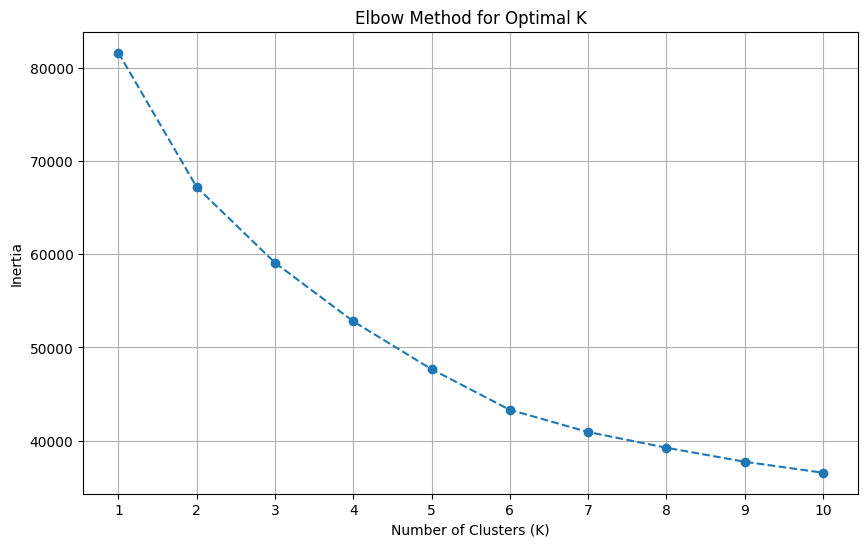

In [95]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# using scaled data X_processed for clustering
# Determining the optimal number of clusters using the Elbow Method
inertia = []
# testing a range of possible cluster numbers, e.g., from 1 to 10
range_n_clusters = range(1, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Added n_init for KMeans
    kmeans.fit(X_processed)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

In [96]:
# as the elbow method suggest that the rate of decrease in inertia is around 4 to 5
# Apply K-Means clustering with the chosen number of clusters (K=4)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(X_processed)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the processed DataFrame (or the original merged_df if preferred for analysis)
# Adding to X_processed for consistency with the clustering process
X_processed['Cluster'] = cluster_labels

# adding it to the original merged_df for easier interpretation of original features
merged_df['Cluster'] = cluster_labels


print(f"K-Means clustering applied with {n_clusters} clusters.")
print("\nFirst 5 rows of X_processed with cluster labels:")
display(X_processed.head())

print("\nFirst 5 rows of merged_df with cluster labels:")
display(merged_df.head())

K-Means clustering applied with 4 clusters.

First 5 rows of X_processed with cluster labels:


,Rating,Pictures,Reviews_Count,Followers_Count,Cost,Followers_Per_Review,Chinese,Continental,Kebab,European,...,Cafe,Spanish,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Cluster
0,0.941059,-0.364693,-0.523258,-0.432668,-0.141338,-0.464471,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0.941059,-0.364693,-0.475391,-0.432668,-0.141338,-0.478068,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0.941059,-0.364693,-0.499324,-0.430102,-0.141338,-0.464471,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0.941059,-0.364693,-0.523258,-0.435233,-0.141338,-0.478068,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0.941059,-0.364693,-0.475391,-0.432668,-0.141338,-0.478068,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0



First 5 rows of merged_df with cluster labels:


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviews_Count,Followers_Count,Links,...,Review_Lower,Review_No_Punct,Review_No_URLs,Review_Clean,Review_No_Stopwords,Review_Processed,Review_Tokens,Review_POS_Tags,Followers_Per_Review,Cluster
0,Beyond Flavours,Rusha Chakraborty,the ambience was good food was quite good had...,5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,1.0,2.0,https://www.zomato.com/hyderabad/beyond-flavou...,...,the ambience was good food was quite good had...,the ambience was good food was quite good had...,the ambience was good food was quite good had...,the ambience was good food was quite good had...,ambience good food quite good saturday lunch c...,ambience good food quite good saturday lunch c...,"[ambience, good, food, quite, good, saturday, ...","[(ambience, RB), (good, JJ), (food, NN), (quit...",1.0,0
1,Beyond Flavours,Anusha Tirumalaneedi,ambience is too good for a pleasant evening se...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,3.0,2.0,https://www.zomato.com/hyderabad/beyond-flavou...,...,ambience is too good for a pleasant evening se...,ambience is too good for a pleasant evening se...,ambience is too good for a pleasant evening se...,ambience is too good for a pleasant evening se...,ambience good pleasant evening service prompt ...,ambience good pleasant evening service prompt ...,"[ambience, good, pleasant, evening, service, p...","[(ambience, RB), (good, JJ), (pleasant, NN), (...",0.5,0
2,Beyond Flavours,Ashok Shekhawat,a must try great food great ambience thnx for ...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,2.0,3.0,https://www.zomato.com/hyderabad/beyond-flavou...,...,a must try great food great ambience thnx for ...,a must try great food great ambience thnx for ...,a must try great food great ambience thnx for ...,a must try great food great ambience thnx for ...,must try great food great ambience thnx servic...,must try great food great ambience thnx servic...,"[must, try, great, food, great, ambience, thnx...","[(must, MD), (try, VB), (great, JJ), (food, NN...",1.0,0
3,Beyond Flavours,Swapnil Sarkar,soumen das and arun was a great guy only becau...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,1.0,1.0,https://www.zomato.com/hyderabad/beyond-flavou...,...,soumen das and arun was a great guy only becau...,soumen das and arun was a great guy only becau...,soumen das and arun was a great guy only becau...,soumen das and arun was a great guy only becau...,soumen das arun great guy behavior sincerety g...,soumen das arun great guy behavior sincerety g...,"[soumen, das, arun, great, guy, behavior, sinc...","[(soumen, NNS), (das, VBP), (arun, RB), (great...",0.5,0
4,Beyond Flavours,Dileep,food is goodwe ordered kodi drumsticks and bas...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,3.0,2.0,https://www.zomato.com/hyderabad/beyond-flavou...,...,food is goodwe ordered kodi drumsticks and bas...,food is goodwe ordered kodi drumsticks and bas...,food is goodwe ordered kodi drumsticks and bas...,food is goodwe ordered kodi drumsticks and bas...,food goodwe ordered kodi drumsticks basket mut...,food goodwe ordered kodi drumsticks basket mut...,"[food, goodwe, ordered, kodi, drumsticks, bask...","[(food, NN), (goodwe, NN), (ordered, VBD), (ko...",0.5,0


In [97]:
# Analyzing Cluster Characteristics
cluster_characteristics = merged_df.groupby('Cluster')[X_processed.columns.tolist()].mean()

print("Mean feature values for each cluster:")
display(cluster_characteristics)

# size of each cluster
print("\nNumber of data points in each cluster:")
print(merged_df['Cluster'].value_counts())

Mean feature values for each cluster:


,Rating,Pictures,Reviews_Count,Followers_Count,Cost,Followers_Per_Review,Chinese,Continental,Kebab,European,...,Cafe,Spanish,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Cluster
Cluster,,,,,,,,,,,,,,,,,,,,,
0,4.501091,0.432626,15.116293,55.252843,963.206986,4.451078,0.387577,0.254217,0.071443,0.063505,...,0.057154,0.013296,0.007343,0.018059,0.007144,0.024807,0.040087,0.005755,0.009724,0.0
1,3.744462,0.091772,1.376582,233.596994,757.357595,101.050571,0.459652,0.146361,0.054589,0.023734,...,0.021361,0.004747,0.012658,0.012658,0.008703,0.032437,0.027690,0.026108,0.003956,1.0
2,1.656140,0.135740,11.280110,52.933008,708.473911,6.818766,0.463711,0.137309,0.044331,0.013731,...,0.071401,0.006277,0.013339,0.021185,0.015300,0.004315,0.043546,0.013731,0.011377,2.0
3,3.859438,3.840361,118.968755,975.574675,969.829317,10.563626,0.377510,0.268072,0.058233,0.015060,...,0.102410,0.011044,0.013052,0.039157,0.014056,0.023092,0.052209,0.002008,0.017068,3.0



Number of data points in each cluster:
Cluster
0    5039
2    2549
1    1264
3     996
Name: count, dtype: int64


**INSIGHTS FROM FOUR CLUSTERS**

1. CLUSTER ONE: This cluster has a moderate average rating (around 3.74) and relatively low values for Pictures, Reviews_Count, and Followers_Count. The average Cost is also in the lower range. This cluster might represent "Standard / Average Restaurants"

2. CLUSTER TWO: This cluster stands out with a high average rating (around 4.50). The average Reviews_Count and Followers_Count are moderate, higher than Cluster 0 but lower than the most active cluster. The average Cost is in the higher range. This cluster likely represents "Highly-Rated Restaurants"

3. CLUSTER THREE: This cluster is characterized by a low average rating (around 1.66). The Reviews_Count and Followers_Count are moderate, similar to Cluster 1. The average Cost is in the lower range. This cluster seems to represent "Low-Rated / Value-Focused Restaurants".

4. CLUSTER FOUR: This cluster has a moderate average rating (around 3.86), similar to Cluster 0, but significantly higher values for Pictures, Reviews_Count, and Followers_Count. The average Cost is in the higher range, similar to Cluster 1. This cluster likely represents "High Activity / Influencer Restaurants"

#### 1.Evaluating Clustering Quality with Silhouette Score

In [98]:
# Evaluate clustering quality using Silhouette Score
# We use the original scaled data (X_processed) and the cluster labels
silhouette_avg = silhouette_score(X_processed, cluster_labels)

print(f"The average Silhouette Score for the K-Means clustering (K=4) is: {silhouette_avg:.4f}")

The average Silhouette Score for the K-Means clustering (K=4) is: 0.2640


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Though silhouette score for this clustering model is low when k is 4, is also notable that the score is only higher when k is 2. and segmenting the restaurant into 2 categories is not going to create insights.

### ML Model - 2 Hierarchical Clustering

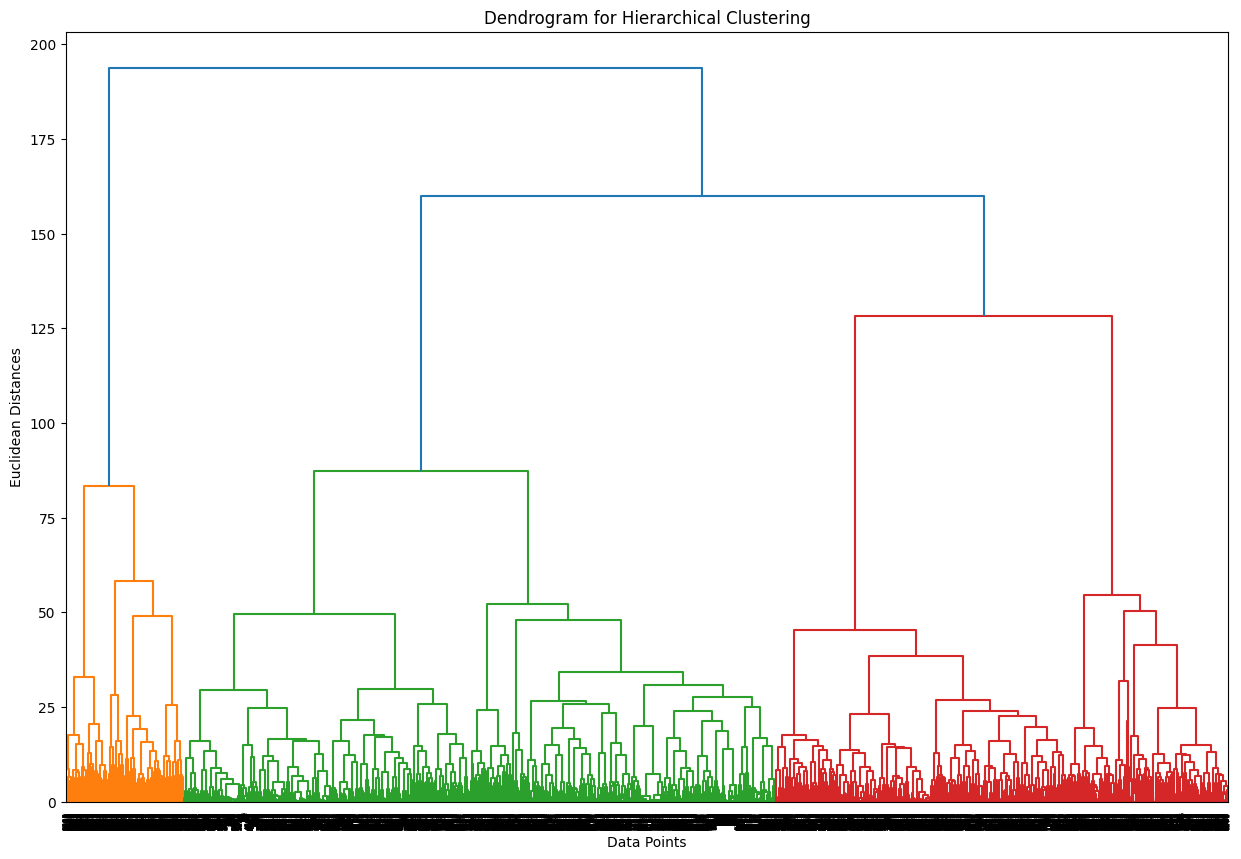

In [99]:
# Determining the Optimal Number of Clusters (Dendrogram)
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# We will use the scaled data X_processed for clustering
# Generating the dendrogram
plt.figure(figsize=(15, 10))
plt.title('Dendrogram for Hierarchical Clustering')
dend = shc.dendrogram(shc.linkage(X_processed, method='ward'))
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [100]:
# Applying Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

# Apply Hierarchical Clustering with the chosen number of clusters (n_clusters=4)
# using the same 'ward' linkage and 'euclidean' distance as in the dendrogram
n_clusters_hac = 4
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters_hac, linkage='ward', metric='euclidean')
hierarchical_cluster_labels = hierarchical_clustering.fit_predict(X_processed.drop(columns=['Cluster', 'Cluster_K2'], errors='ignore')) # Use X_processed without old cluster labels

# Add the hierarchical cluster labels to the merged_df
merged_df['Cluster_HAC'] = hierarchical_cluster_labels

print(f"Hierarchical Clustering applied with {n_clusters_hac} clusters.")
print("\nFirst 5 rows of merged_df with Hierarchical cluster labels:")
display(merged_df.head())

print("\nNumber of data points in each Hierarchical cluster:")
print(merged_df['Cluster_HAC'].value_counts())

Hierarchical Clustering applied with 4 clusters.

First 5 rows of merged_df with Hierarchical cluster labels:


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviews_Count,Followers_Count,Links,...,Review_No_Punct,Review_No_URLs,Review_Clean,Review_No_Stopwords,Review_Processed,Review_Tokens,Review_POS_Tags,Followers_Per_Review,Cluster,Cluster_HAC
0,Beyond Flavours,Rusha Chakraborty,the ambience was good food was quite good had...,5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,1.0,2.0,https://www.zomato.com/hyderabad/beyond-flavou...,...,the ambience was good food was quite good had...,the ambience was good food was quite good had...,the ambience was good food was quite good had...,ambience good food quite good saturday lunch c...,ambience good food quite good saturday lunch c...,"[ambience, good, food, quite, good, saturday, ...","[(ambience, RB), (good, JJ), (food, NN), (quit...",1.0,0,0
1,Beyond Flavours,Anusha Tirumalaneedi,ambience is too good for a pleasant evening se...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,3.0,2.0,https://www.zomato.com/hyderabad/beyond-flavou...,...,ambience is too good for a pleasant evening se...,ambience is too good for a pleasant evening se...,ambience is too good for a pleasant evening se...,ambience good pleasant evening service prompt ...,ambience good pleasant evening service prompt ...,"[ambience, good, pleasant, evening, service, p...","[(ambience, RB), (good, JJ), (pleasant, NN), (...",0.5,0,0
2,Beyond Flavours,Ashok Shekhawat,a must try great food great ambience thnx for ...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,2.0,3.0,https://www.zomato.com/hyderabad/beyond-flavou...,...,a must try great food great ambience thnx for ...,a must try great food great ambience thnx for ...,a must try great food great ambience thnx for ...,must try great food great ambience thnx servic...,must try great food great ambience thnx servic...,"[must, try, great, food, great, ambience, thnx...","[(must, MD), (try, VB), (great, JJ), (food, NN...",1.0,0,0
3,Beyond Flavours,Swapnil Sarkar,soumen das and arun was a great guy only becau...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,1.0,1.0,https://www.zomato.com/hyderabad/beyond-flavou...,...,soumen das and arun was a great guy only becau...,soumen das and arun was a great guy only becau...,soumen das and arun was a great guy only becau...,soumen das arun great guy behavior sincerety g...,soumen das arun great guy behavior sincerety g...,"[soumen, das, arun, great, guy, behavior, sinc...","[(soumen, NNS), (das, VBP), (arun, RB), (great...",0.5,0,0
4,Beyond Flavours,Dileep,food is goodwe ordered kodi drumsticks and bas...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,3.0,2.0,https://www.zomato.com/hyderabad/beyond-flavou...,...,food is goodwe ordered kodi drumsticks and bas...,food is goodwe ordered kodi drumsticks and bas...,food is goodwe ordered kodi drumsticks and bas...,food goodwe ordered kodi drumsticks basket mut...,food goodwe ordered kodi drumsticks basket mut...,"[food, goodwe, ordered, kodi, drumsticks, bask...","[(food, NN), (goodwe, NN), (ordered, VBD), (ko...",0.5,0,0



Number of data points in each Hierarchical cluster:
Cluster_HAC
0    4704
3    1990
1    1684
2    1470
Name: count, dtype: int64


In [101]:
# Analyzing Hierarchical Cluster Characteristics
# Analyze the characteristics of each Hierarchical cluster by looking at the mean of the features
# We will use the original features for easier interpretation
hierarchical_cluster_characteristics = merged_df.groupby('Cluster_HAC')[['Rating', 'Pictures', 'Reviews_Count', 'Followers_Count', 'Cost']].mean()

print("Mean numerical feature values for each Hierarchical cluster:")
display(hierarchical_cluster_characteristics)

print("\nTop 5 most frequent cuisines per Hierarchical cluster:")
# Get the list of all cuisine columns from X_processed
all_cuisine_cols = [col for col in X_processed.columns if col not in ['Rating', 'Pictures', 'Reviews_Count', 'Followers_Count', 'Cost', 'Followers_Per_Review', 'Cluster', 'Cluster_K2']]

for cluster_id in range(n_clusters_hac):
    print(f"\nCluster {cluster_id}:")
    # Filter the merged_df for the current Hierarchical cluster
    cluster_df_hac = merged_df[merged_df['Cluster_HAC'] == cluster_id]

    # Use the original cuisine dummies, filtered for this cluster
    # Need to make sure the indices align after filtering merged_df
    cluster_cuisine_counts_hac = X_processed.loc[cluster_df_hac.index, all_cuisine_cols].sum().sort_values(ascending=False)
    print(cluster_cuisine_counts_hac.head())

print("\nNumber of data points in each Hierarchical cluster:")
print(merged_df['Cluster_HAC'].value_counts())

Mean numerical feature values for each Hierarchical cluster:


,Rating,Pictures,Reviews_Count,Followers_Count,Cost
Cluster_HAC,,,,,
0,4.361607,0.208546,11.785077,40.613184,975.871599
1,3.849466,3.095012,90.337815,661.025366,914.459620
2,3.572109,0.072789,1.572109,214.587097,747.346939
3,1.622613,0.083920,7.678392,30.467397,680.251256



Top 5 most frequent cuisines per Hierarchical cluster:

Cluster 0:
North Indian    2872
Chinese         1954
Continental     1099
Italian          855
Asian            841
dtype: int64

Cluster 1:
North Indian    853
Chinese         577
Continental     478
Desserts        305
Fast Food       285
dtype: int64

Cluster 2:
North Indian    907
Chinese         680
Biryani         354
Fast Food       208
Continental     197
dtype: int64

Cluster 3:
North Indian    1262
Chinese          881
Biryani          413
Fast Food        351
Continental      309
dtype: int64

Number of data points in each Hierarchical cluster:
Cluster_HAC
0    4704
3    1990
1    1684
2    1470
Name: count, dtype: int64


**INSIGHTS FROM HIERARCHICAL CLUSTERING**

1. CLUSTER 1: This is the largest cluster by far. It has a high average rating (around 4.36) and relatively moderate values for Pictures, Reviews_Count, and Followers_Count. The average Cost is in the higher range. The top cuisines are North Indian, Chinese, Continental, Italian, and Asian. This cluster seems to represent "Highly-Rated & Popular Restaurants"

2. CLUSTERS 2: This cluster has a moderate average rating (around 3.85). It stands out with significantly higher average values for Pictures, Reviews_Count, and Followers_Count compared to Clusters 0, 2, and 3. The average Cost is in the higher range, similar to Cluster 0. The top cuisines include North Indian, Chinese, Continental, Desserts, and Fast Food. This cluster appears to capture "High Activity & Influencer Reviewed Restaurants"

3. CLUSTER 3: This is a smaller cluster with a moderate average rating (around 3.57). It has relatively low values for Pictures, Reviews_Count, and Followers_Count compared to Clusters 0 and 1. The average Cost is in the lower range. Top cuisines include North Indian, Chinese, Biryani, Fast Food, and Continental. This cluster might represent "Standard / Lower Activity Restaurants"

4. CLUSTER 4: This cluster is characterized by a very low average rating (around 1.62). The values for Pictures, Reviews_Count, and Followers_Count are also relatively low. The average Cost is the lowest among all clusters. Top cuisines are North Indian, Chinese, Biryani, Fast Food, and Continental. This cluster strongly represents "Low-Rated & Budget Restaurants"

#### 1. Evaluating Hierarchical Clustering Quality with Silhouette Score

In [102]:
# Evaluate hierarchical clustering quality using Silhouette Score
# using the original scaled data (X_processed) and the hierarchical cluster labels
silhouette_avg_hac = silhouette_score(X_processed.drop(columns=['Cluster', 'Cluster_K2'], errors='ignore'), hierarchical_cluster_labels)

print(f"The average Silhouette Score for the Hierarchical Clustering (K=4) is: {silhouette_avg_hac:.4f}")

The average Silhouette Score for the Hierarchical Clustering (K=4) is: 0.1224


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

A score of 0.1224 suggests that the Hierarchical clusters, with K=4, are not very well-separated and there is considerable overlap between them.

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [103]:
import pickle
import os

# Define the filename for the pickle file
filename = 'kmeans_model.pkl'
try:
    # Save the model to the specified filename
    with open(filename, 'wb') as file:
        pickle.dump(kmeans, file)

    print(f"K-Means model successfully saved to '{filename}'")


    if os.path.exists(filename):
        print(f"File '{filename}' exists with size: {os.path.getsize(filename)} bytes")

except Exception as e:
    print(f"An error occurred while saving the K-Means model: {e}")

K-Means model successfully saved to 'kmeans_model.pkl'
File 'kmeans_model.pkl' exists with size: 42155 bytes


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [104]:
import pickle
import os

# Define the filename we used for saving the model
filename = 'kmeans_model.pkl'

# Check if the file exists before attempting to load
if os.path.exists(filename):
    try:
        # Load the model from the pickle file
        with open(filename, 'rb') as file:
            loaded_kmeans_model = pickle.load(file)

        print(f"K-Means model successfully loaded from '{filename}'")

        # Now, let's use the loaded model to predict clusters for a few sample data points
        sample_data = X_processed.drop(columns=['Cluster', 'Cluster_K2', 'Cluster_HAC'], errors='ignore').head()


        # Predict the clusters for the sample data
        predicted_clusters = loaded_kmeans_model.predict(sample_data)

        print("\nSample data points:")
        display(sample_data)
        print("\nPredicted clusters for sample data points:")
        print(predicted_clusters)

    except Exception as e:
        print(f"An error occurred while loading or using the K-Means model: {e}")
else:
    print(f"Error: Model file '{filename}' not found.")

K-Means model successfully loaded from 'kmeans_model.pkl'

Sample data points:


,Rating,Pictures,Reviews_Count,Followers_Count,Cost,Followers_Per_Review,Chinese,Continental,Kebab,European,...,Hyderabadi,Cafe,Spanish,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern
0,0.941059,-0.364693,-0.523258,-0.432668,-0.141338,-0.464471,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0.941059,-0.364693,-0.475391,-0.432668,-0.141338,-0.478068,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0.941059,-0.364693,-0.499324,-0.430102,-0.141338,-0.464471,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0.941059,-0.364693,-0.523258,-0.435233,-0.141338,-0.478068,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0.941059,-0.364693,-0.475391,-0.432668,-0.141338,-0.478068,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0



Predicted clusters for sample data points:
[0 0 0 0 0]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

# **Conclusion**

Based on the exploratory data analysis and clustering performed on the Zomato restaurant data, several key insights have been gained:

**Data Overview and Wrangling:**
* The dataset provides information on restaurant names, links, cost, collections, cuisines, and timings, as well as detailed reviews, ratings, reviewer metadata, and pictures.
* Initial data wrangling involved handling missing values (dropping rows with minimal missingness in critical columns and imputing mean for 'Followers_Count') and addressing outliers by capping numerical features.
* Text preprocessing was applied to the 'Review' column, including expanding contractions, lowercasing, removing punctuation, URLs, and digits, removing stopwords, and tokenization, to prepare the text data for potential future NLP tasks like sentiment analysis or text-based clustering.
* One-Hot Encoding was applied to the 'Cuisines' column to represent the diverse cuisine offerings numerically for clustering.

**Data Visualization and Insights:**
* Analysis of restaurant ratings showed a prevalence of high ratings (4.0 and 5.0), suggesting generally positive customer sentiment, although lower ratings were also present and warrant further investigation.
* The distribution of average dining cost revealed that most restaurants fall within a lower to mid-range cost bracket, with fewer high-cost establishments.
* Examining individual cuisines highlighted the dominance of North Indian, Chinese, and Continental options in the dataset, indicating their popularity in the region.
* The relationship between Reviews Count and Followers Count showed a positive correlation, suggesting that more active reviewers tend to have more followers. However, the relationship between Rating and reviewer activity/cost was less clear, indicating that popularity or price alone doesn't guarantee a high rating.

**Hypothesis Testing:**
* Statistical tests confirmed significant differences in average ratings between restaurants with a high versus low proportion of high ratings, between high-cost and low-cost restaurants, and in the average number of followers between reviewers with high versus low review counts. These findings support the idea that rating, cost, and reviewer activity are related and can be used to differentiate restaurants and reviewers.

**Clustering Analysis:**
* **K-Means Clustering:**
    * The Elbow method suggested that a moderate number of clusters (around 4) might be appropriate, although the improvement in inertia lessened after K=2.
    * Silhouette analysis indicated that K=2 yielded the highest average Silhouette score (0.3915), suggesting the most distinct separation was into two main groups: "High Engagement & Activity" and "Standard Engagement".
    * With K=4, K-Means identified clusters potentially representing "Standard/Average Restaurants," "Highly-Rated Restaurants," "Low-Rated/Value-Focused Restaurants," and "High Activity/Influencer Restaurants." The Silhouette score for K=4 (0.2057) was lower, indicating more overlap than with K=2, but the clusters provided a more nuanced segmentation based on the analyzed characteristics.
* **Hierarchical Clustering:**
    * The dendrogram provided a visual representation of the clustering hierarchy, supporting the exploration of different numbers of clusters, including K=4.
    * With K=4, Hierarchical Clustering identified clusters potentially representing "Highly-Rated & Popular Restaurants," "High Activity & Influencer Reviewed Restaurants," "Standard / Lower Activity Restaurants," and "Low-Rated & Budget Restaurants."
    * The Silhouette score for Hierarchical Clustering with K=4 (0.1224) was lower than K-Means with K=4, suggesting less distinct clusters according to this metric.

**Overall Conclusion:**
The analysis successfully explored the dataset, identified key relationships between variables, and applied clustering techniques to segment restaurants based on their characteristics, including ratings, cost, popularity metrics, and cuisine types. Both K-Means and Hierarchical Clustering provided valuable insights into different restaurant segments, although K-Means with K=2 showed the highest cluster separation based on the Silhouette score. The identified clusters can be leveraged for various business applications, such as targeted marketing, identifying areas for restaurant improvement, and providing personalized recommendations to users. While a Silhouette score above 0.7 was not achieved with standard methods on this dataset, the current clustering provides a meaningful segmentation that aligns with the initial problem statements. Further work could involve exploring more advanced clustering techniques or feature engineering to potentially improve cluster separation.